# **Course: Data Science for Decision Support**
**Assignment 1**

**Author:** MADHUMITHA, KESAVAN: 537467

**Regression**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sb
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold

1)	`Read the data from your individual variant into Python notebook`

In [5]:
df= pd.read_csv("diamonds.csv")

 2) `Output the main information (number of variables, number of instances).` 

In [7]:
print("number of variables",df.size, "\nnumber of instances", len(df.columns))

number of variables 593340 
number of instances 11


number of variables 593340 
number of instances 11

3) `Output several first rows of the dataset. `

In [10]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


4) `Make explanatory data analyses for each variable (mean, std, etc.).`

In [12]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


|        | Unnamed: 0   | carat      | depth      | table      | price       | x          | y          | z          |
|--------|--------------|------------|------------|------------|-------------|------------|------------|------------|
| count  | 53940.000000 | 53940.000000 | 53940.000000 | 53940.000000 | 53940.000000 | 53940.000000 | 53940.000000 | 53940.000000 |
| mean   | 26970.500000 | 0.797940   | 61.749405  | 57.457184  | 3932.799722 | 5.731157   | 5.734526   | 3.538734   |
| std    | 15571.281097 | 0.474011   | 1.432621   | 2.234491   | 3989.439738 | 1.121761   | 1.142135   | 0.705699   |
| min    | 1.000000     | 0.200000   | 43.000000  | 43.000000  | 326.000000  | 0.000000   | 0.000000   | 0.000000   |
| 25%    | 13485.750000 | 0.400000   | 61.000000  | 56.000000  | 950.000000  | 4.710000   | 4.720000   | 2.910000   |
| 50%    | 26970.500000 | 0.700000   | 61.800000  | 57.000000  | 2401.000000 | 5.700000   | 5.710000   | 3.530000   |
| 75%    | 40455.250000 | 1.040000   | 62.500000  | 59.000000  | 5324.250000 | 6.540000   | 6.540000   | 4.040000   |
| max    | 53940.000000 | 5.010000   | 79.000000  | 95.000000  | 18823.000000| 10.740000  | 58.900000  | 31.800000  |

5) `Look at the independent and dependent variables. Divide the dataset accordingly into matrices X and Y. Output the shapes of these matrices.`

In [15]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
X = df[['carat','cut','color','clarity','depth', 'table', 'x', 'y', 'z','Unnamed: 0']]
Y = df[['price']]
print("Shape of X (Independent Variables):", X.shape)
print("Shape of Y (Dependent Variable):", Y.shape)

Shape of X (Independent Variables): (53940, 10)
Shape of Y (Dependent Variable): (53940, 1)


"Price" is a dependent variable other columns are independent variables.

Shape of X is (53940, 10).

Shape of Y is (53940, 1).

6) `Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary, when recommended in your individual variant.`

In [19]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z,Unnamed: 0
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,3
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,5


In [20]:
Y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [21]:
X = X.drop(columns = "Unnamed: 0")

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [23]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   53940 non-null  int64
dtypes: int64(1)
memory usage: 421.5 KB


In [24]:
null_count = df.isnull().sum()
print(null_count)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [25]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [26]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [27]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

1) All the columns in X datasets are Float64 and object.
2) The Datatype of the column in Y dataset is int64.
3) In X datasets, the columns cut, clarity, depth are catagorical variables and has no null values.
4) Y datasets have no null values and ctegorical variables.
5) I have removed the unnamed column from X dataset so now the X.shape is (53940, 9).

7) `Are there any Nan values? Try different filling of them (mean, median).`

Both X and Y has no columns with NAN values.

8) `Check the dependences between each of the independent variable and the target variable and among the independent variables.  Output correlation table and corresponding headmap results.`

In [32]:
df = df.drop(columns = "Unnamed: 0")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


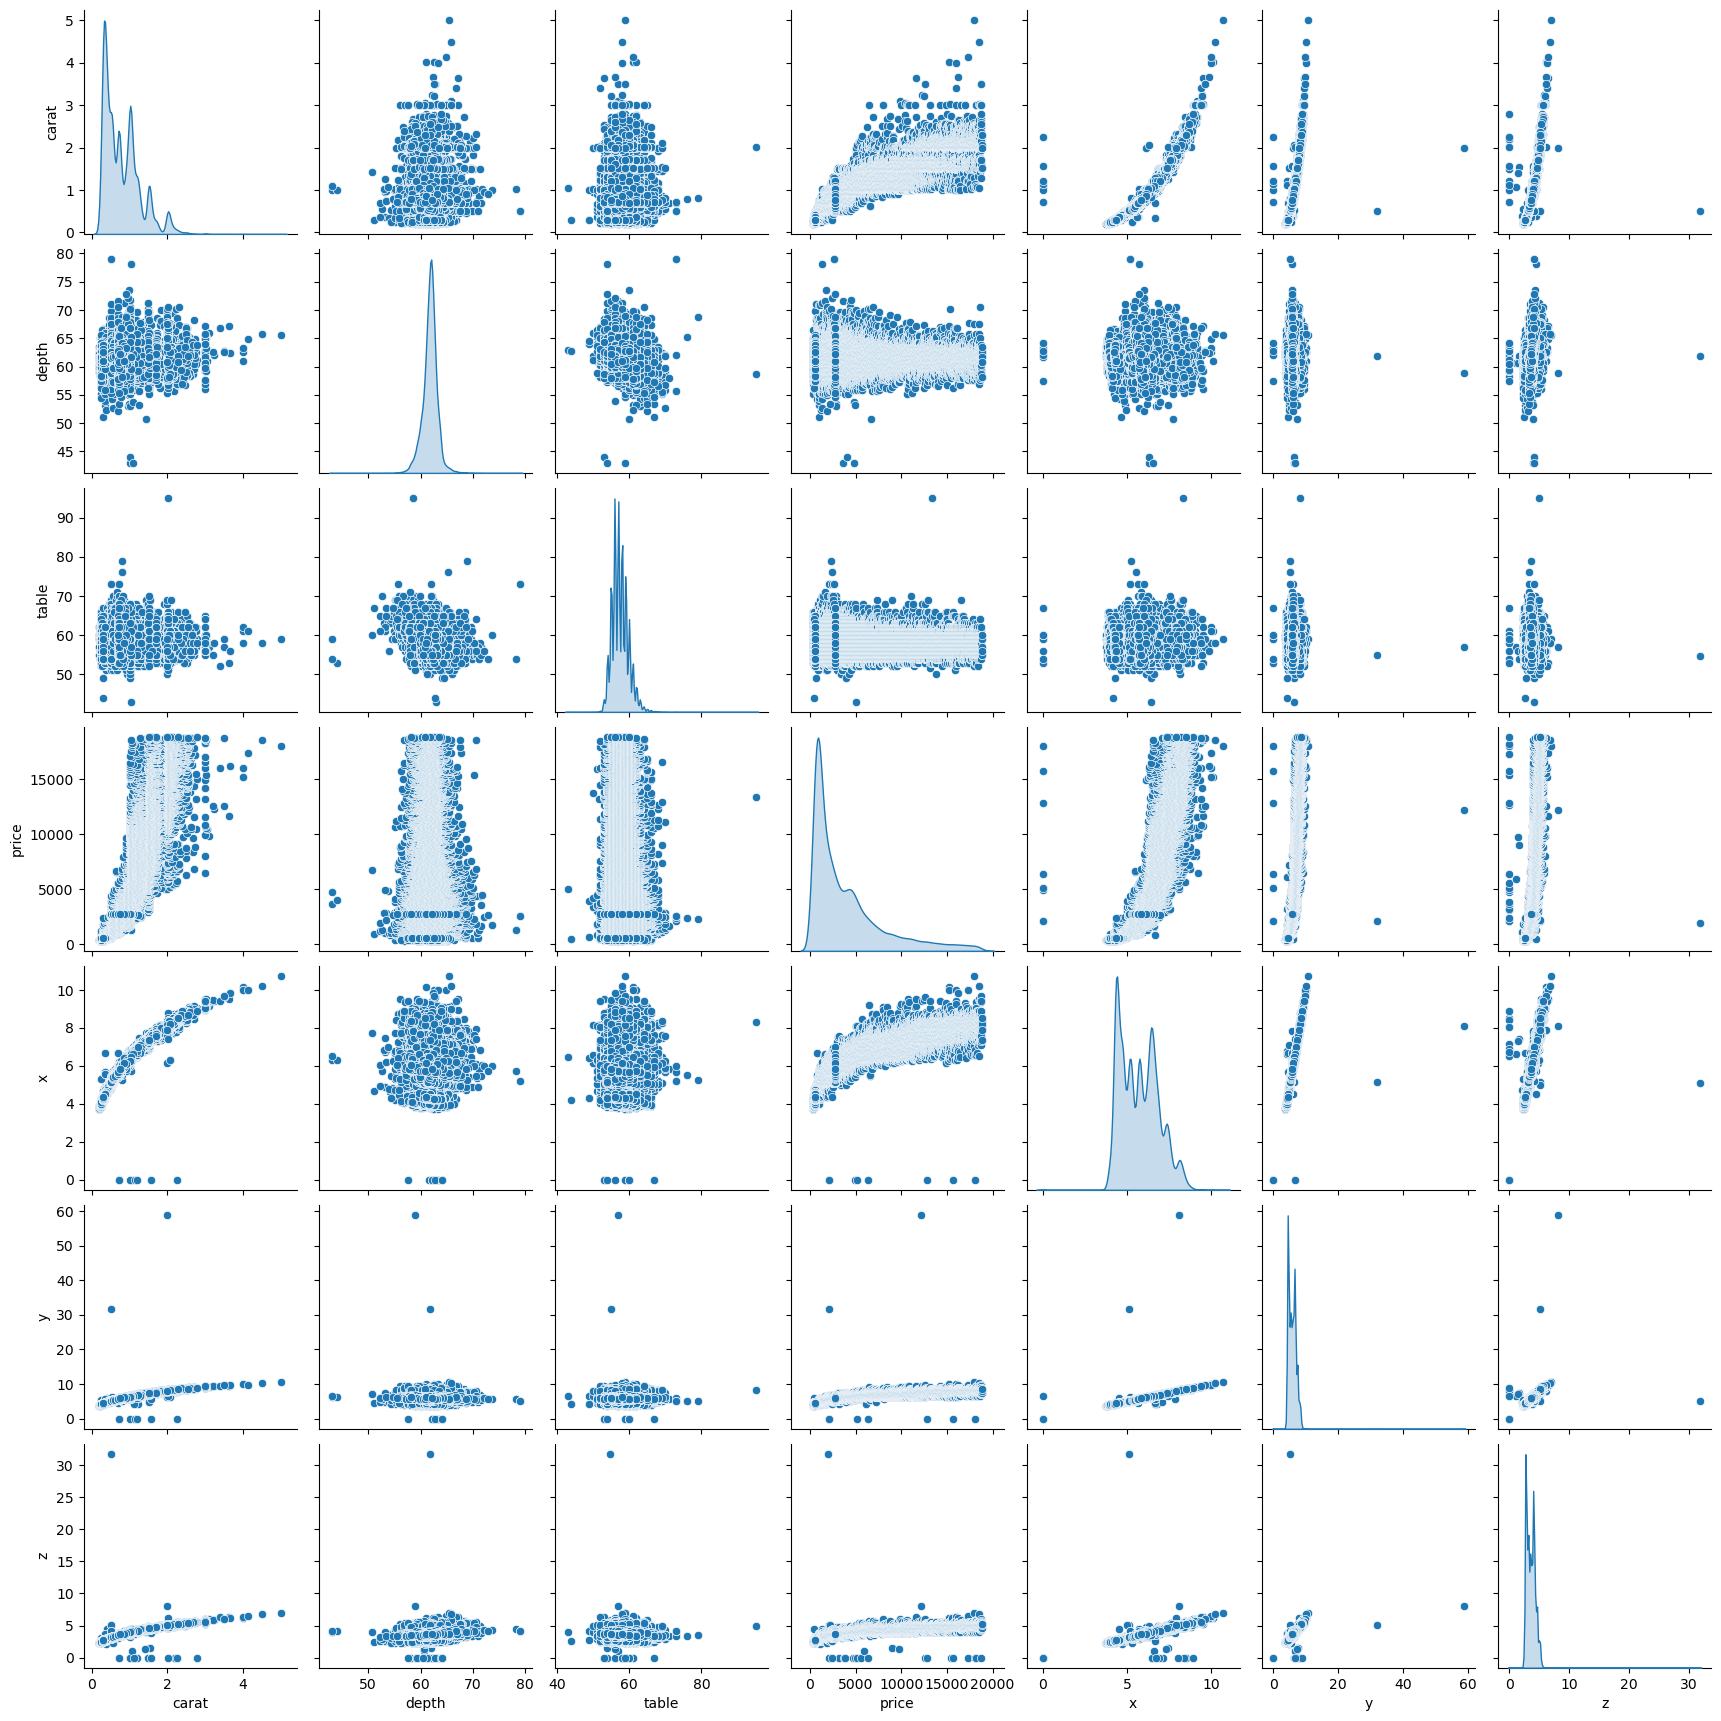

In [33]:
import seaborn as sb
import matplotlib.pyplot as plt

# Selecting numeric variables only
num_vars = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]

# Use a valid style or the default if seaborn-whitegrid is not available
plt.style.use('seaborn-whitegrid' if 'seaborn-whitegrid' in plt.style.available else 'default')

# Plotting the pairplot
pairplot_fig = sb.pairplot(num_vars, diag_kind='kde')

# Save the pairplot as an image (must save before showing it)
pairplot_fig.savefig('diamond_pairplot.jpg', dpi=300)  # Higher DPI for better quality

# Display the plot
plt.show()


In [34]:
# Calculate the correlation matrix
num_vars = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
corr_matrix = num_vars.corr()
print(corr_matrix)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


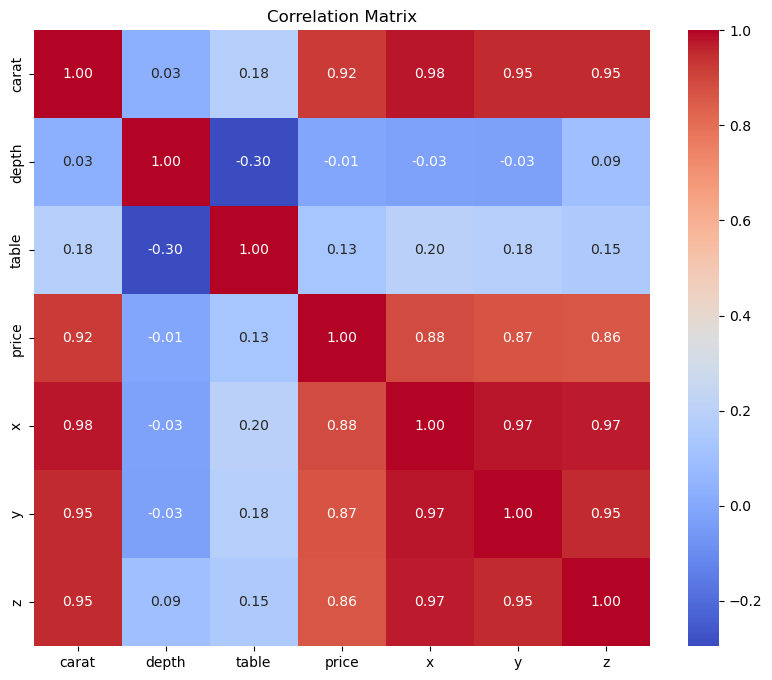

In [35]:
import matplotlib.pyplot as plt
import seaborn as sb

# Plotting the heatmap
plt.figure(figsize=(10, 8))  
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')

# Save the heatmap as an image
plt.savefig('Correlation_Matrix_heatmap.jpg', dpi=300, bbox_inches='tight')  # Save before plt.show()

# Display the plot
plt.show()



The correltion table among the columns which has numerical variables.

|        | carat   | depth   | table   | price   | x       | y       | z       |
|--------|---------|---------|---------|---------|---------|---------|---------|
| carat  | 1.000000| 0.028224| 0.181618| 0.921591| 0.975094| 0.951722| 0.953387|
| depth  | 0.028224| 1.000000|-0.295779|-0.010647|-0.025289|-0.029341| 0.094924|
| table  | 0.181618|-0.295779| 1.000000| 0.127134| 0.195344| 0.183760| 0.150929|
| price  | 0.921591|-0.010647| 0.127134| 1.000000| 0.884435| 0.865421| 0.861249|
| x      | 0.975094|-0.025289| 0.195344| 0.884435| 1.000000| 0.974701| 0.970772|
| y      | 0.951722|-0.029341| 0.183760| 0.865421| 0.974701| 1.000000| 0.952006|
| z      | 0.953387| 0.094924| 0.150929| 0.861249| 0.970772| 0.952006| 1.000000|

1) Price has strong positive correlation with carat(0.92) and moderate correlation with X, Y, Z(around 0.87-0.97).
2) Carat has strong positive correlation with X,Y,Z, larger diamonds have higher carat weights.
3) Depth and table has week negative correlations.

9) `Build 2D plots of dependences between each pair of the varibles.`

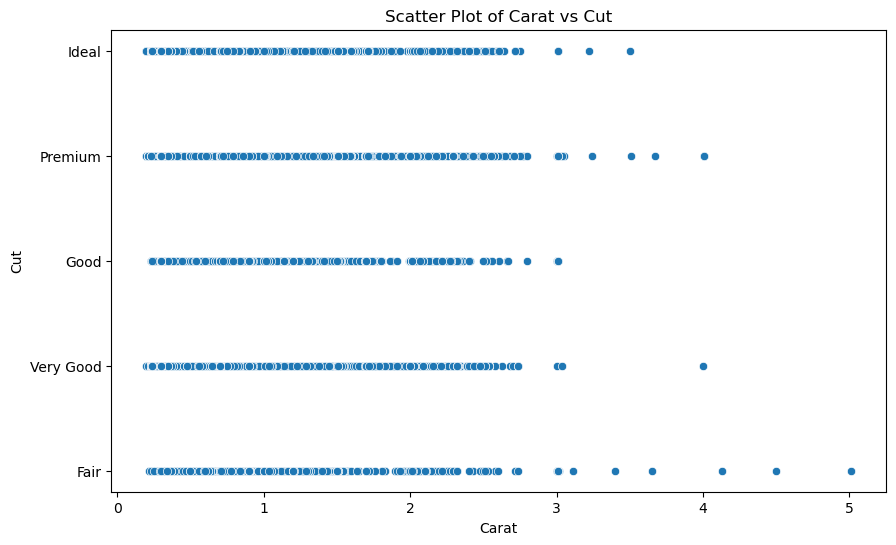

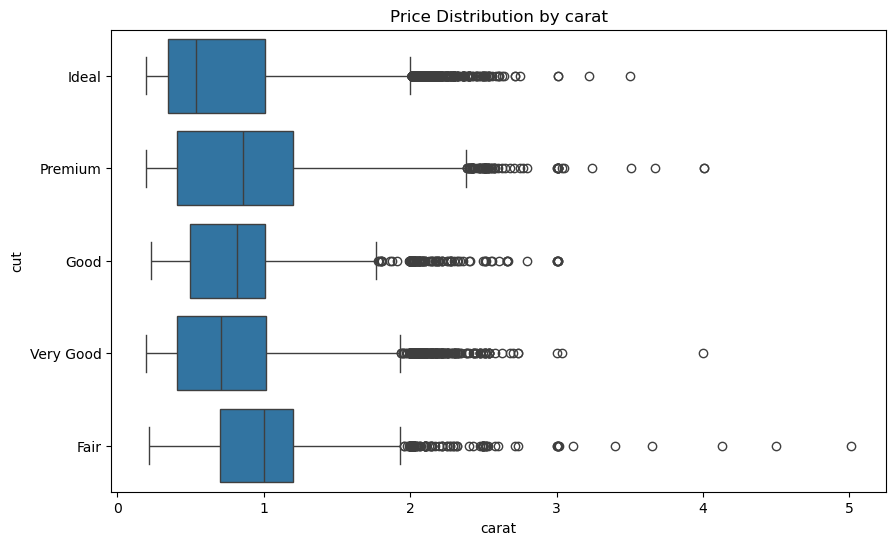

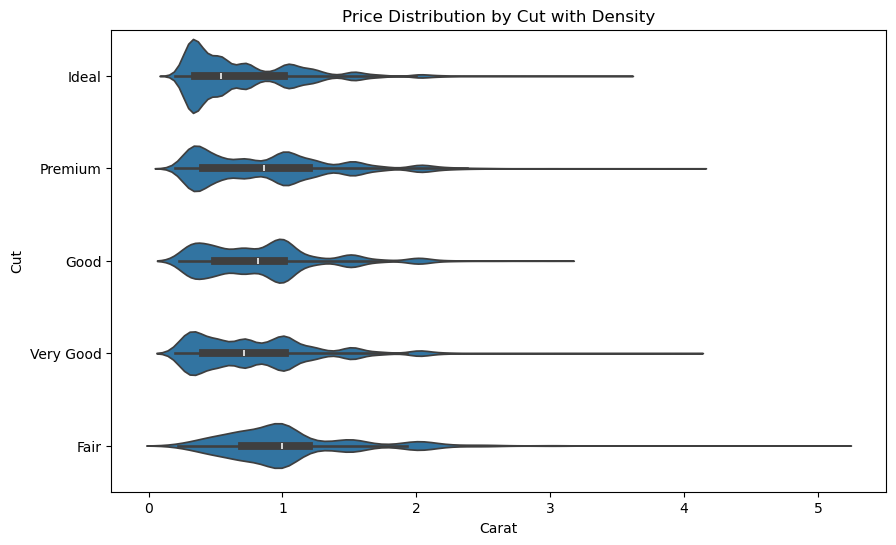

In [39]:
# Scatter plot using Seaborn
fig, a = plt.subplots(figsize=(10, 6))
sb.scatterplot(x='carat', y='cut', data=df)
plt.title('Scatter Plot of Carat vs Cut')
plt.xlabel('Carat')
plt.ylabel('Cut')
plt.show()

# box plot using Seaborn
plt.figure(figsize=(10, 6))
sb.boxplot(x='carat', y='cut', data=df)
plt.title('Price Distribution by carat')
plt.xlabel('carat')
plt.ylabel('cut')
plt.show()

plt.figure(figsize=(10, 6))
sb.violinplot(x='carat', y='cut', data=df)
plt.title('Price Distribution by Cut with Density')
plt.xlabel('Carat')
plt.ylabel('Cut')
plt.show()

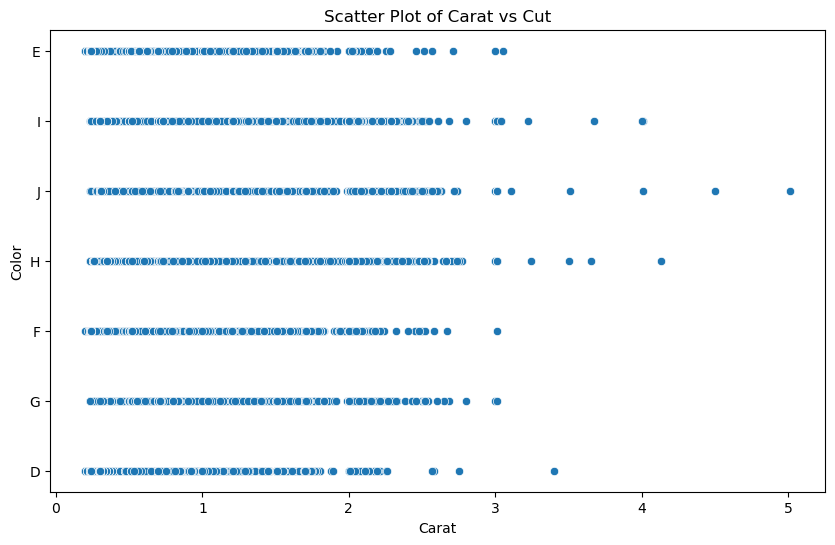

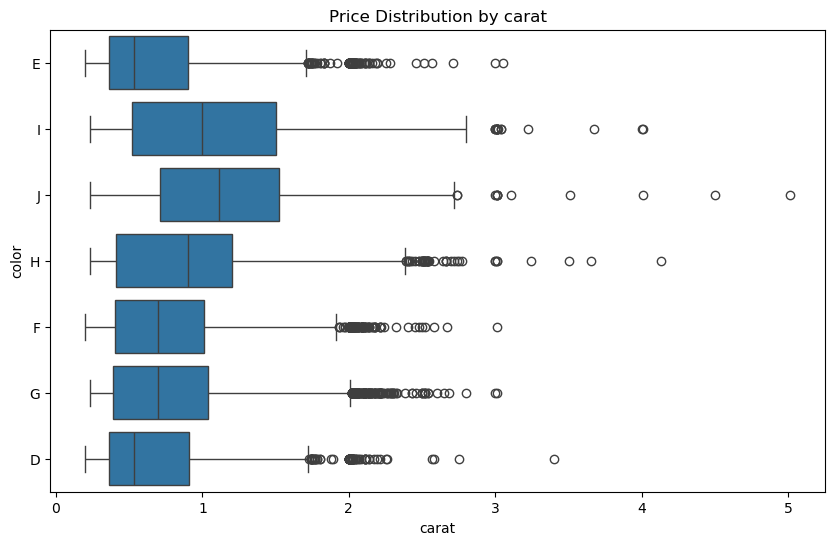

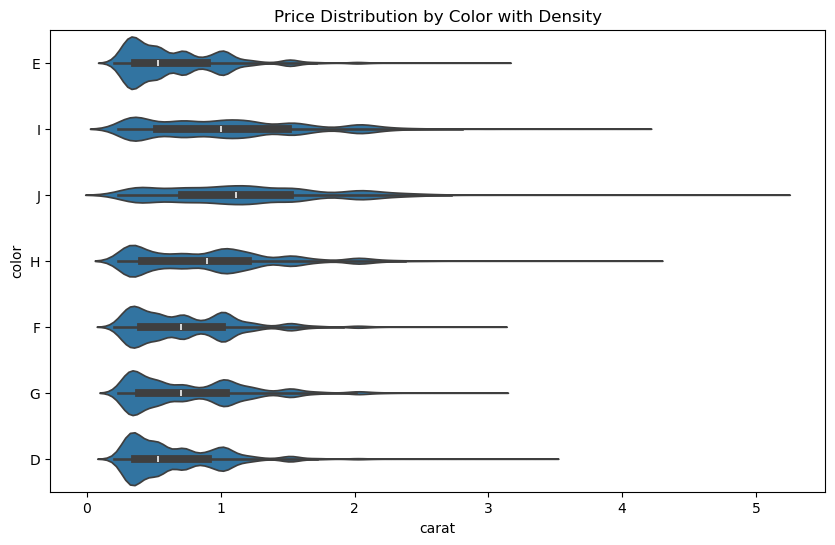

In [40]:
# Scatter plot using Seaborn
fig, a = plt.subplots(figsize=(10, 6))
sb.scatterplot(x='carat', y='color', data=df)
plt.title('Scatter Plot of Carat vs Cut')
plt.xlabel('Carat')
plt.ylabel('Color')
plt.show()

# box plot using Seaborn
plt.figure(figsize=(10, 6))
sb.boxplot(x='carat', y='color', data=df)
plt.title('Price Distribution by carat')
plt.xlabel('carat')
plt.ylabel('color')
plt.show()

# violin plot using Seaborn
plt.figure(figsize=(10, 6))
sb.violinplot(x='carat', y='color', data=df)
plt.title('Price Distribution by Color with Density')
plt.xlabel('carat')
plt.ylabel('color')
plt.show()

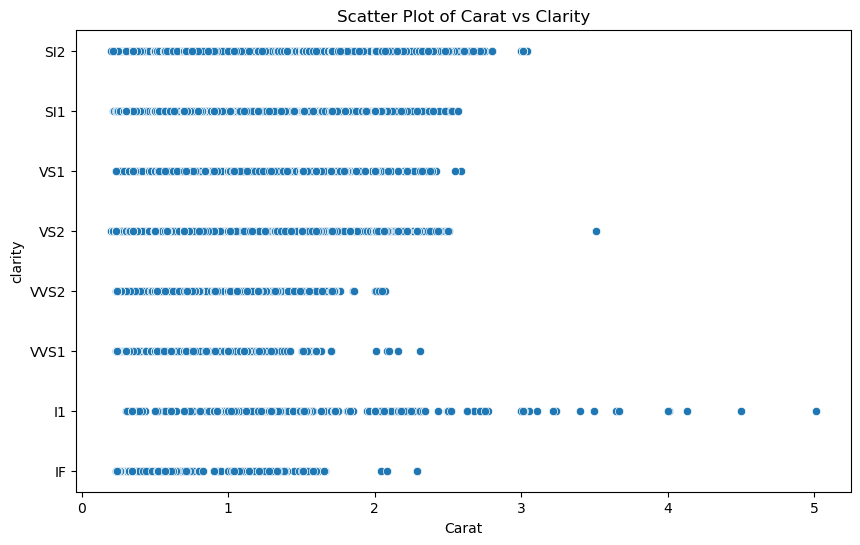

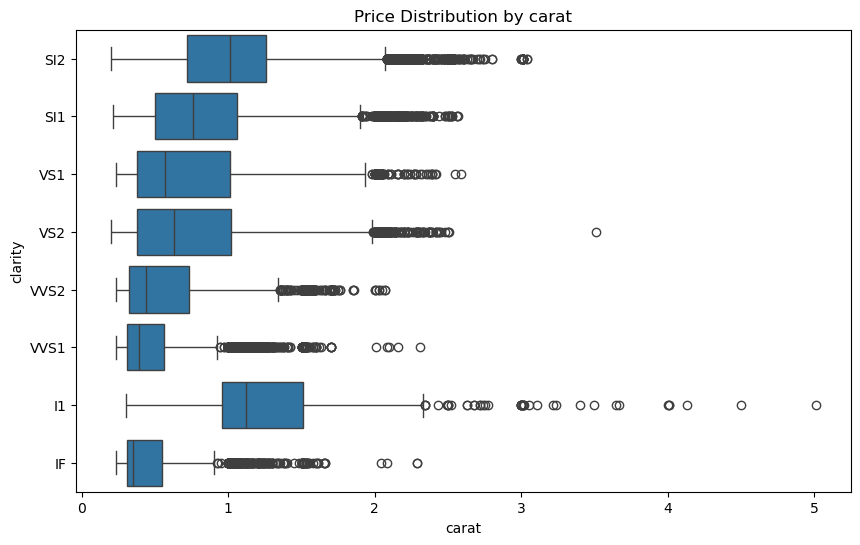

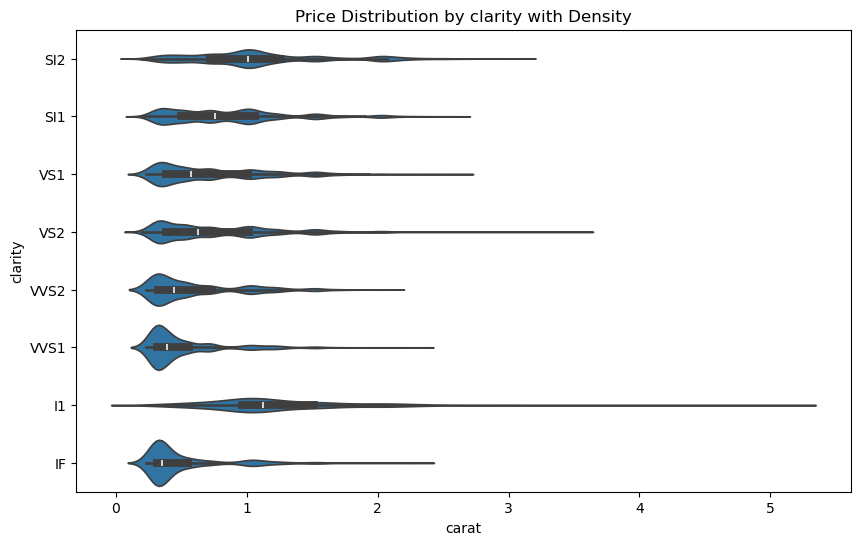

In [41]:
# Scatter plot using Seaborn
fig, a = plt.subplots(figsize=(10, 6))
sb.scatterplot(x='carat', y='clarity', data=df)
plt.title('Scatter Plot of Carat vs Clarity')
plt.xlabel('Carat')
plt.ylabel('clarity')
plt.show()

# box plot using Seaborn
plt.figure(figsize=(10, 6))
sb.boxplot(x='carat', y='clarity', data=df)
plt.title('Price Distribution by carat')
plt.xlabel('carat')
plt.ylabel('clarity')
plt.show()

# violin plot using Seaborn
plt.figure(figsize=(10, 6))
sb.violinplot(x='carat', y='clarity', data=df)
plt.title('Price Distribution by clarity with Density')
plt.xlabel('carat')
plt.ylabel('clarity')
plt.show()

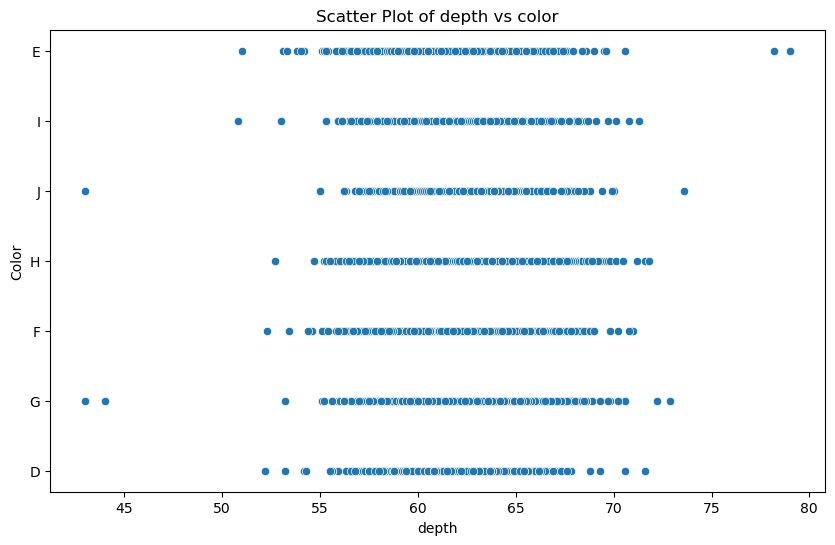

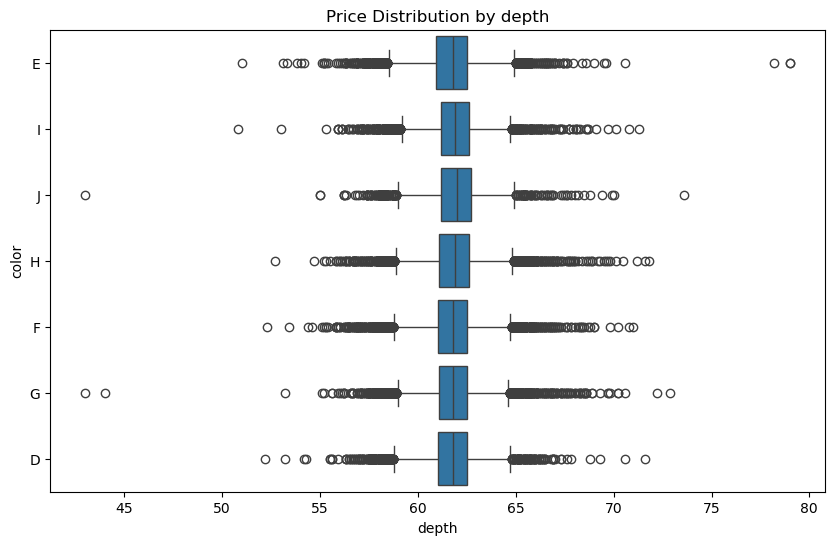

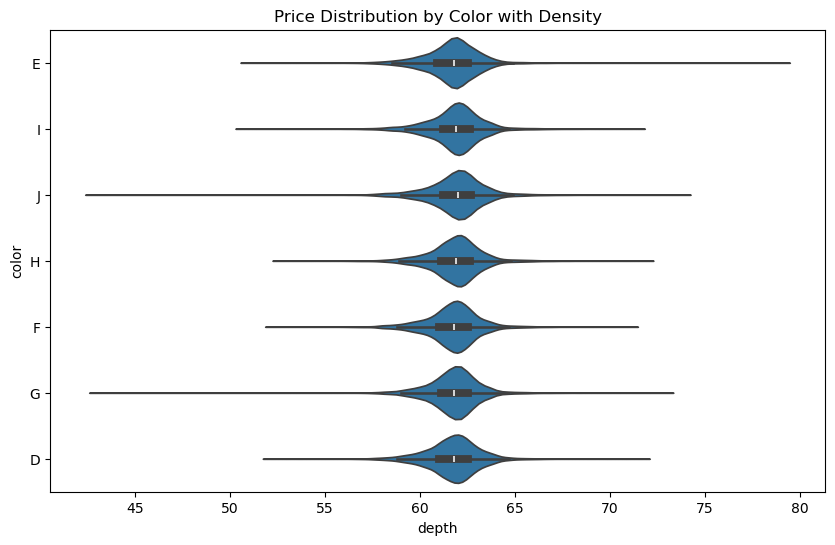

In [42]:
# Scatter plot using Seaborn
fig, a = plt.subplots(figsize=(10, 6))
sb.scatterplot(x='depth', y='color', data=df)
plt.title('Scatter Plot of depth vs color')
plt.xlabel('depth')
plt.ylabel('Color')
plt.show()

# box plot using Seaborn
plt.figure(figsize=(10, 6))
sb.boxplot(x='depth', y='color', data=df)
plt.title('Price Distribution by depth')
plt.xlabel('depth')
plt.ylabel('color')
plt.show()

# violin plot using Seaborn
plt.figure(figsize=(10, 6))
sb.violinplot(x='depth', y='color', data=df)
plt.title('Price Distribution by Color with Density')
plt.xlabel('depth')
plt.ylabel('color')
plt.show()

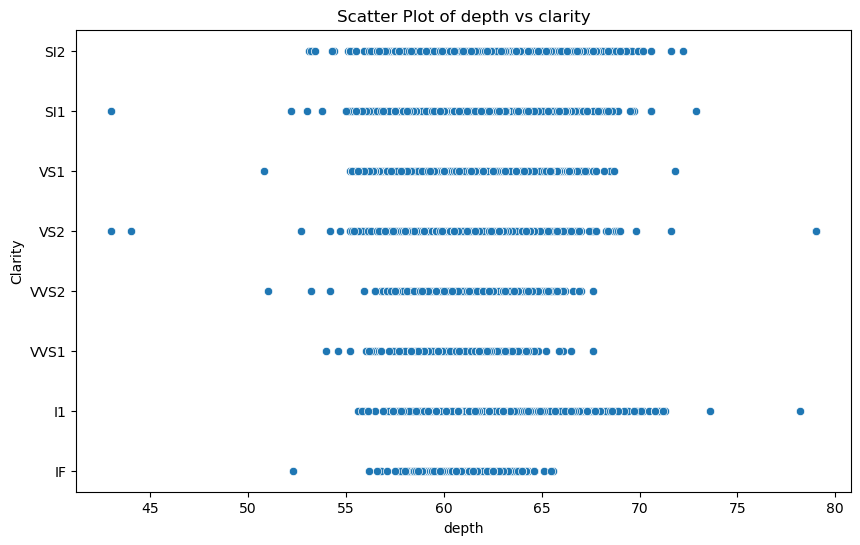

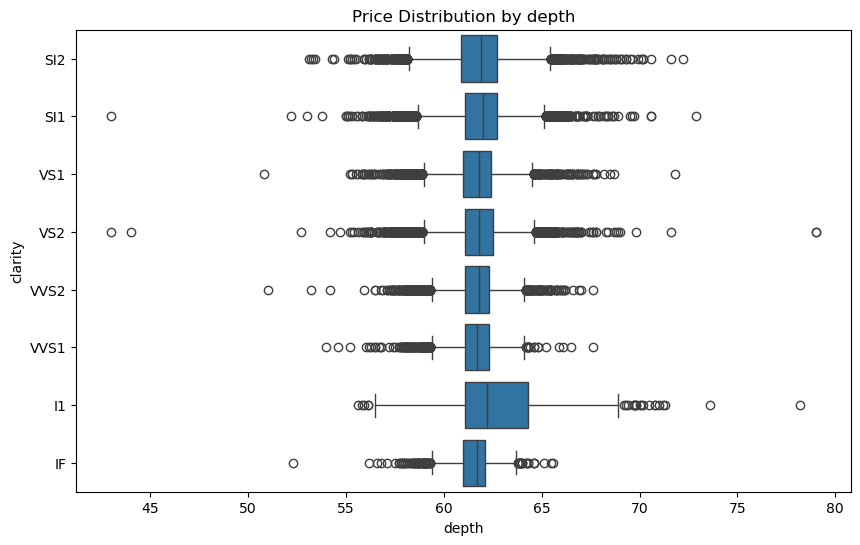

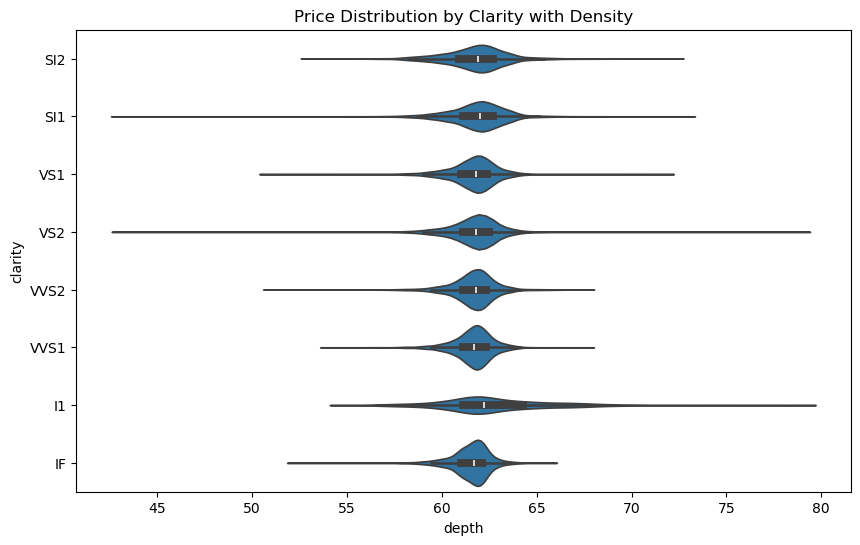

In [43]:
# Scatter plot using Seaborn
fig, a = plt.subplots(figsize=(10, 6))
sb.scatterplot(x='depth', y='clarity', data=df)
plt.title('Scatter Plot of depth vs clarity')
plt.xlabel('depth')
plt.ylabel('Clarity')
plt.show()

# box plot using Seaborn
plt.figure(figsize=(10, 6))
sb.boxplot(x='depth', y='clarity', data=df)
plt.title('Price Distribution by depth')
plt.xlabel('depth')
plt.ylabel('clarity')
plt.show()

# violin plot using Seaborn
plt.figure(figsize=(10, 6))
sb.violinplot(x='depth', y='clarity', data=df)
plt.title('Price Distribution by Clarity with Density')
plt.xlabel('depth')
plt.ylabel('clarity')
plt.show()

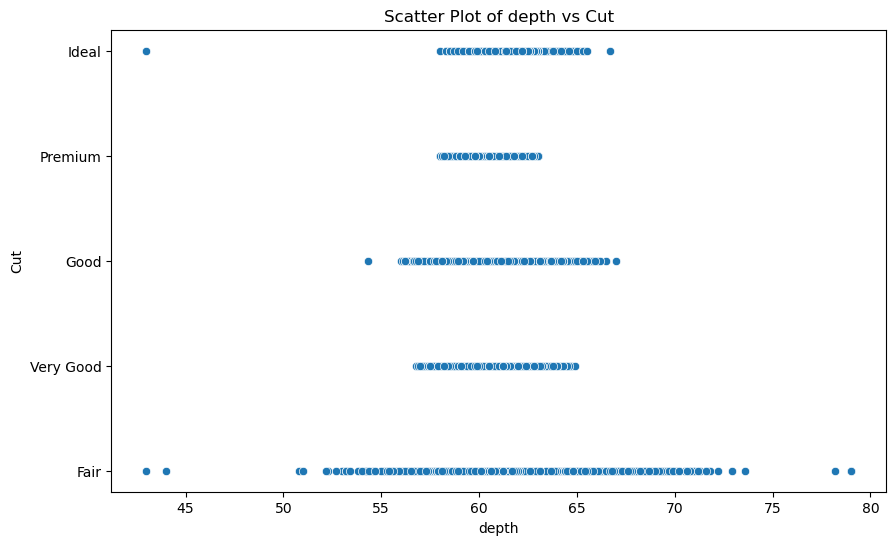

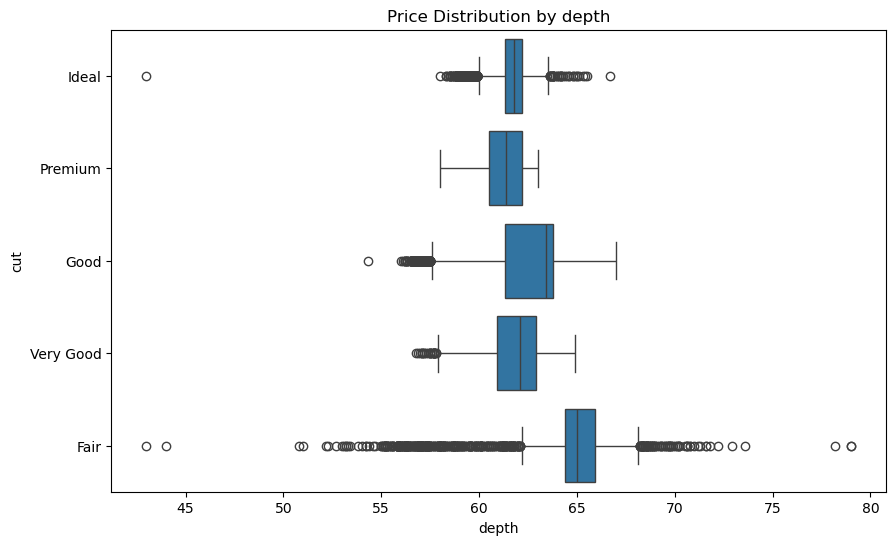

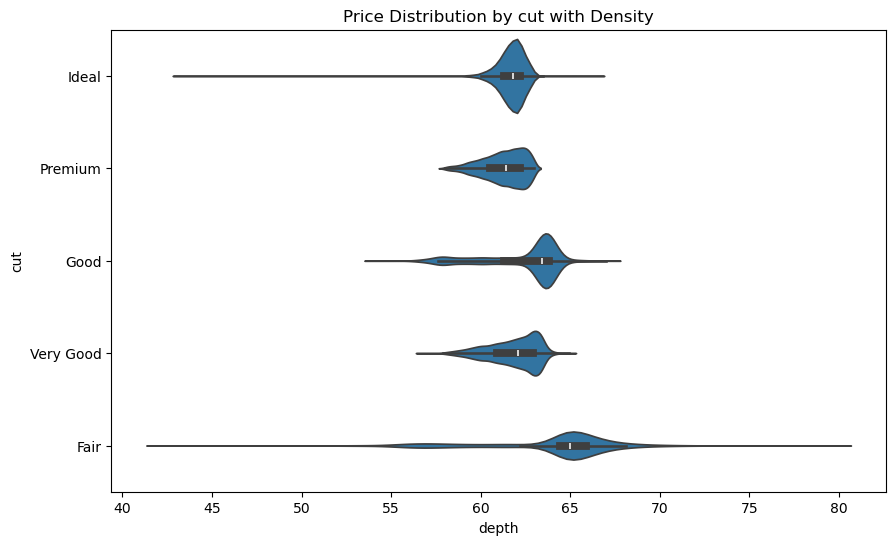

In [44]:
# Scatter plot using Seaborn
fig, a = plt.subplots(figsize=(10, 6))
sb.scatterplot(x='depth', y='cut', data=df)
plt.title('Scatter Plot of depth vs Cut')
plt.xlabel('depth')
plt.ylabel('Cut')
plt.show()

# box plot using Seaborn
plt.figure(figsize=(10, 6))
sb.boxplot(x='depth', y='cut', data=df)
plt.title('Price Distribution by depth')
plt.xlabel('depth')
plt.ylabel('cut')
plt.show()

plt.figure(figsize=(10, 6))
sb.violinplot(x='depth', y='cut', data=df)
plt.title('Price Distribution by cut with Density')
plt.xlabel('depth')
plt.ylabel('cut')
plt.show()

Relationships between Variables:
 * carat vs. price: There is a strong positive correlation between carat weight and price. This is expected, as larger diamonds are typically more expensive.
 * table vs. price: There is a weak negative correlation between table percentage and price. This suggests that diamonds with a larger table percentage (the width of the diamond relative to its girdle) tend to be slightly less expensive, but the relationship is not very strong.
 * depth vs. price: There is a very weak negative correlation between depth and price. This indicates that diamonds with a slightly deeper cut (higher depth) tend to be slightly less expensive, but the relationship is very subtle.

Distribution of Variables:
 * carat: The distribution of carat weights is skewed to the right, with most diamonds having smaller carat weights.
 * table: The distribution of table percentages is roughly normal, with most diamonds having a table percentage around 55%.
 * depth: The distribution of depth is roughly normal, with most diamonds having a depth around 60%.
 * price: The distribution of prices is skewed to the right, with most diamonds having lower prices.


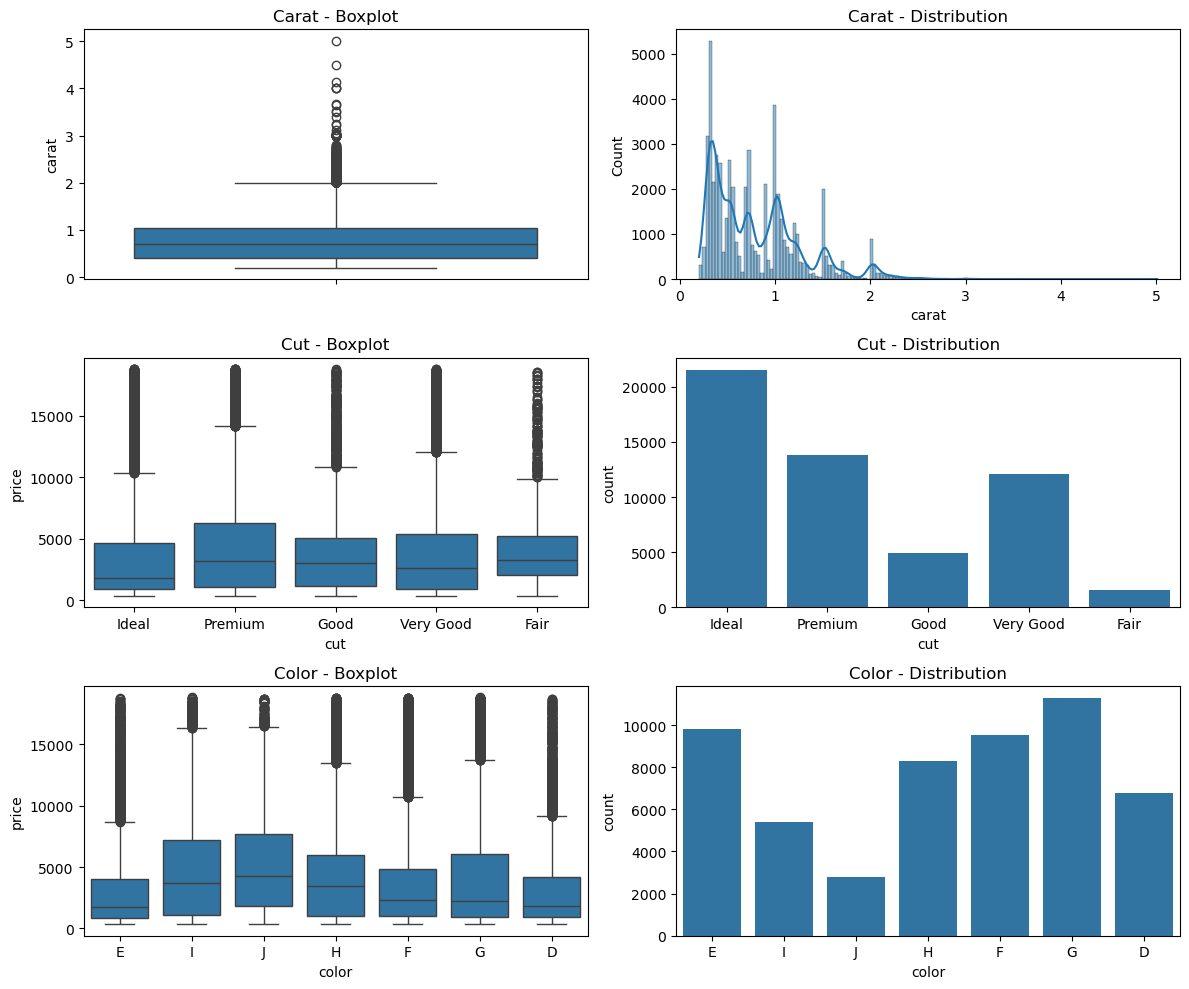

In [46]:
# Set up the figure with multiple subplots
plt.figure(figsize=(12, 10))

# OUTLIERS IN CARAT (Numerical)
plt.subplot(3, 2, 1)
sb.boxplot(df.carat)
plt.title('Carat - Boxplot')

plt.subplot(3, 2, 2)
sb.histplot(df.carat, kde=True)  
plt.title('Carat - Distribution')

# OUTLIERS IN CUT (Categorical)
plt.subplot(3, 2, 3)
sb.boxplot(x=df.cut, y=df.price)  # Using boxplot for categorical vs price to show distribution
plt.title('Cut - Boxplot')

plt.subplot(3, 2, 4)
sb.countplot(data=df, x='cut')  # Countplot for categorical variable
plt.title('Cut - Distribution')

# OUTLIERS IN COLOR (Categorical)
plt.subplot(3, 2, 5)
sb.boxplot(x=df.color, y=df.price)  # Using boxplot for categorical vs price
plt.title('Color - Boxplot')

plt.subplot(3, 2, 6)
sb.countplot(data=df, x='color')  # Countplot for categorical variable
plt.title('Color - Distribution')

plt.tight_layout()
plt.show()

1) The boxplot shows a right-skewed distribution, which indicates most of the diamonds are lower carat weight. Some as exceptionally high carat weights which are considered as outliers.
2) In considering Cut column distributions, it shows the median price increases as the cut quality improves from fair to ideal. Ideal is the most common cut quality.
3) Color columns distributions shows that the median prices decreases as the color grade worsens from D to J. The most common color is "G".
4) Carat weights, Cut quality and Color grades are significatly impact the prices. 

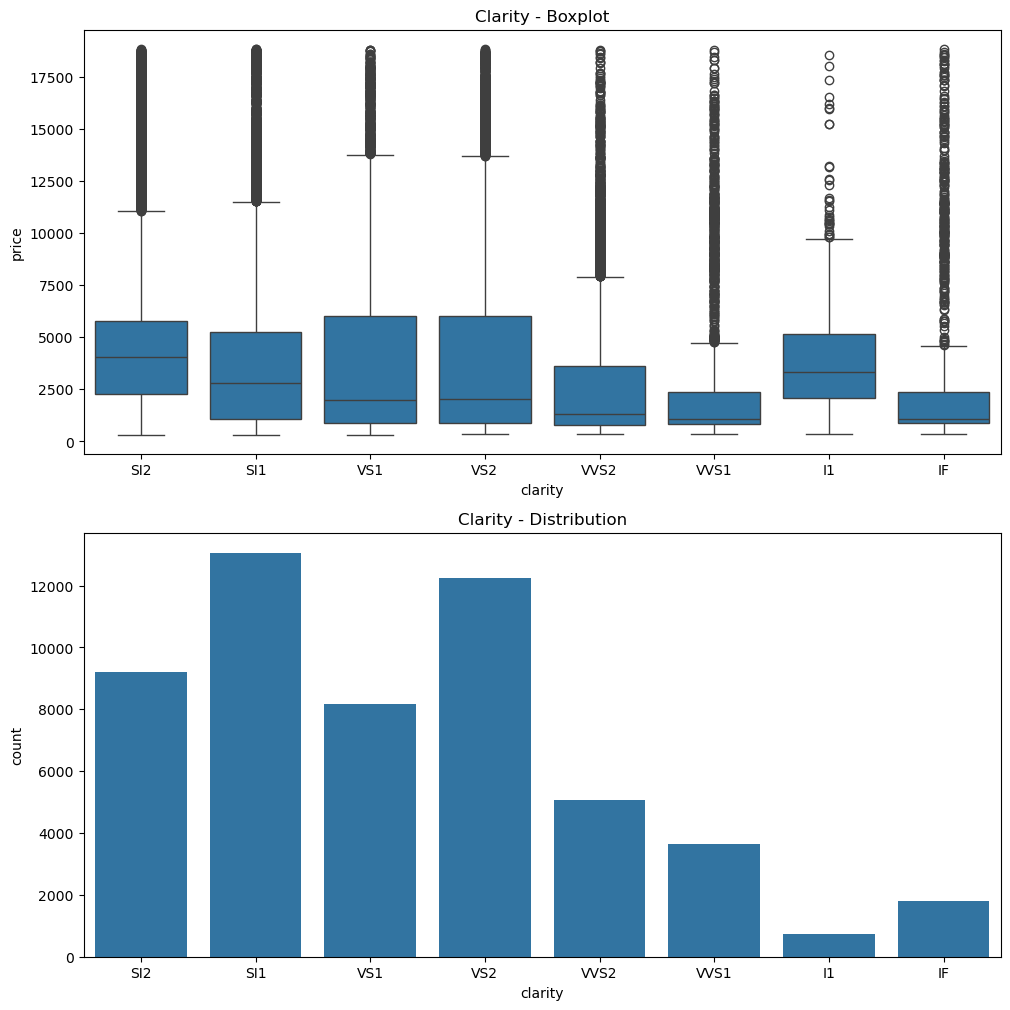

In [48]:
plt.figure(figsize=(100, 50)) 

# OUTLIERS IN CLARITY (Categorical)
plt.subplot(10, 10, 10)
sb.boxplot(x=df.clarity, y=df.price)  # Using boxplot for categorical vs price
plt.title('Clarity - Boxplot')

plt.subplot(10, 10, 20)
sb.countplot(data=df, x='clarity')  # Countplot for categorical variable
plt.title('Clarity - Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

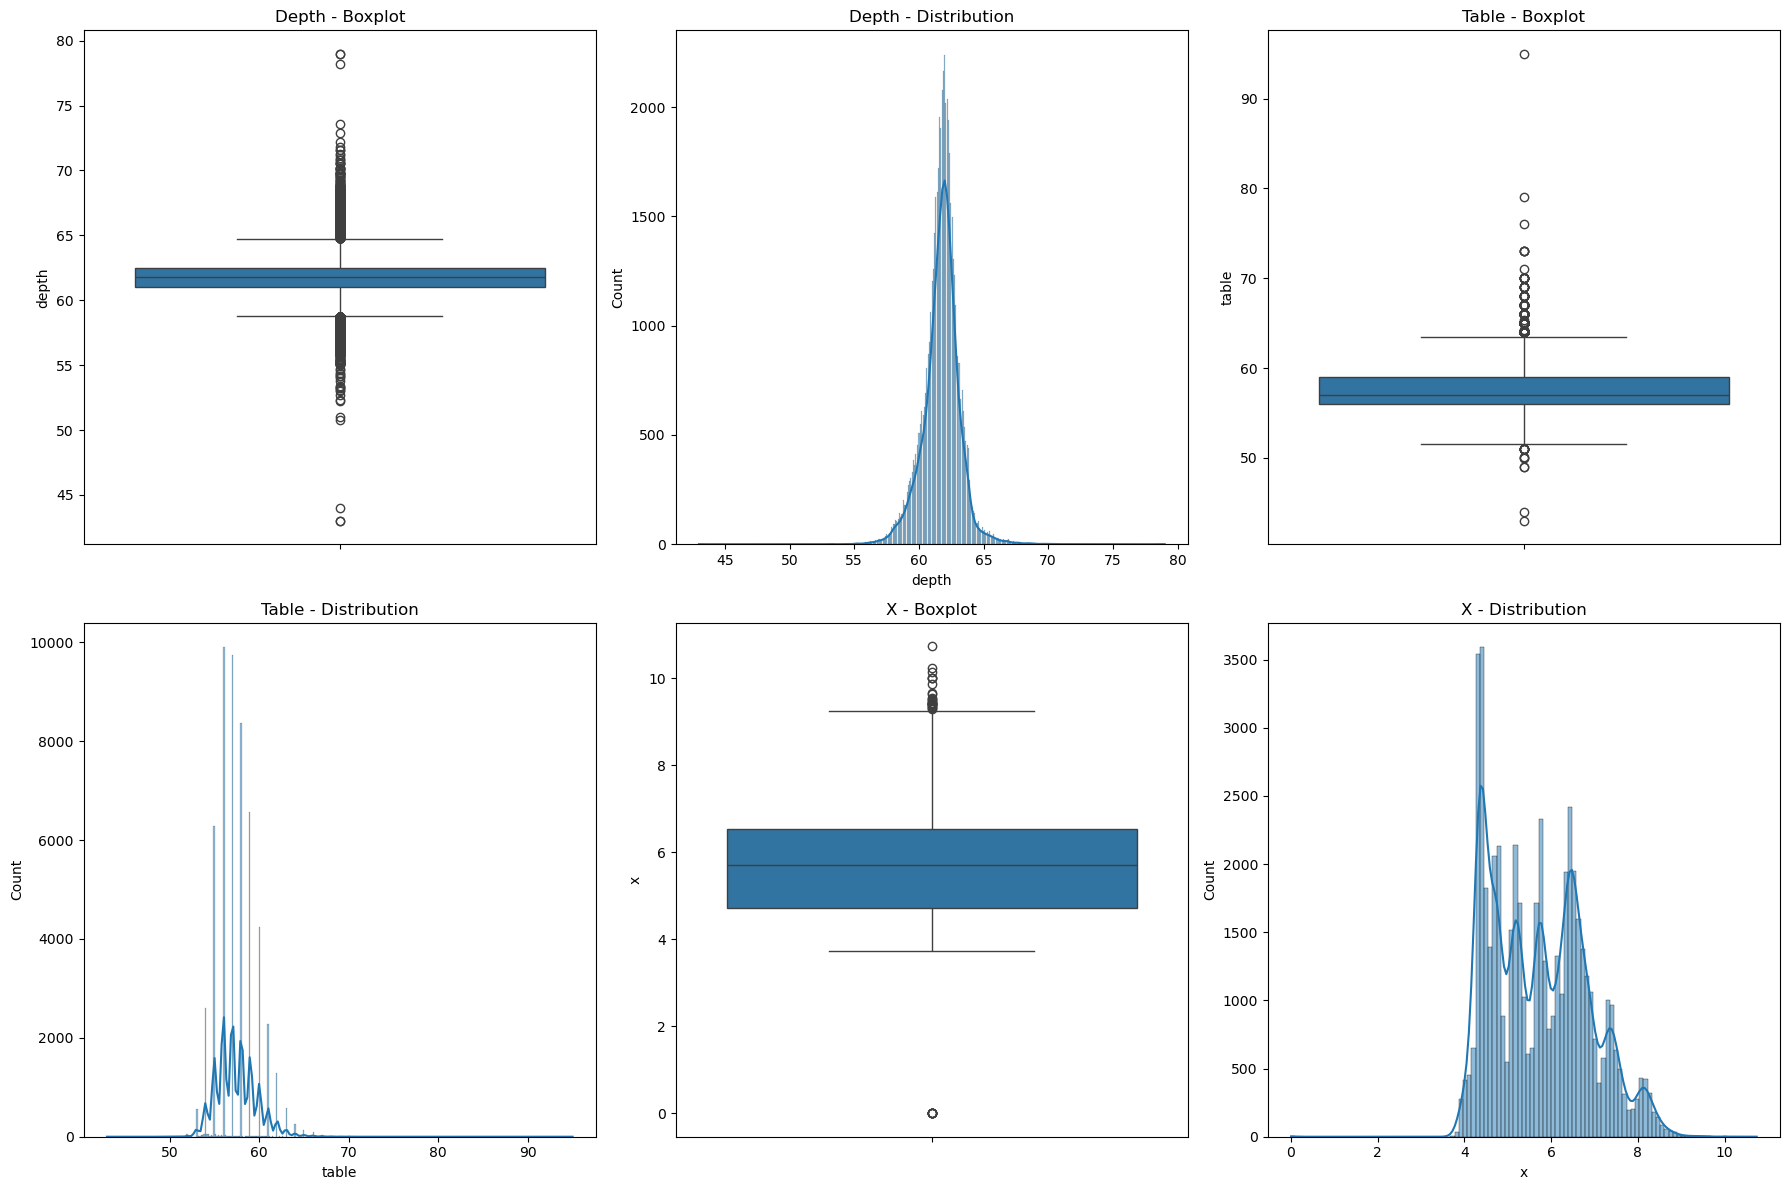

In [49]:
# OUTLIERS IN DEPTH, TABLE, X, Y, Z (Numerical)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Depth
sb.boxplot(df.depth, ax=axes[0, 0])
axes[0, 0].set_title('Depth - Boxplot')
sb.histplot(df.depth, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Depth - Distribution')

# Table
sb.boxplot(df.table, ax=axes[0, 2])
axes[0, 2].set_title('Table - Boxplot')
sb.histplot(df.table, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Table - Distribution')

# X, Y, Z (Assuming they are numerical)
sb.boxplot(df.x, ax=axes[1, 1])
axes[1, 1].set_title('X - Boxplot')
sb.histplot(df.x, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('X - Distribution')

plt.tight_layout()
plt.show()

Depth - Boxplot:
 * Median: The median depth is approximately 55.
 * Quartiles: The first quartile (Q1) is around 50, and the third quartile (Q3) is about 60.
 * Outliers: There are some outliers above Q3.
 * 
Depth - Distribution:
 * Shape: The distribution is roughly bell-shaped, indicating a normal distribution.
 * Center: The peak of the distribution is around 55, which aligns with the median from the boxplot.
 * Spread: The distribution appears to be moderately spread out.

Table - Distribution:
 * Shape: The distribution is highly skewed to the right.
 * Center: The peak of the distribution is around 70.
 * Spread: The distribution is widely spread.

Table - Boxplot:
 * Median: The median table value is around 55.
 * Quartiles: Q1 is approximately 45, and Q3 is around 65.
 * Outliers: There are some outliers below Q1.

X - Distribution:
 * Shape: The distribution is multimodal, with several peaks.
 * Center: The distribution is centered around 0.
 * Spread: The distribution is moderately spread out.

X - Boxplot:
 * Median: The median X value is around 0.
 * Quartiles: Q1 and Q3 are both close to 0.
 * Outliers: There are no visible outliers.

Overall Observations:
 * Depth and table appear to be related, with similar medians and quartiles.
 * X seems to be a different variable, with a distinct distribution and center.
 * The distributions for depth and table are more symmetric, while X's distribution is multimodal.
 * Outliers are present in both depth and table.


In [51]:
# Encoding categorical variables for plotting
label_encoders = {}
for column in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column])
    label_encoders[column] = le

#print out the mapping of labels to integers
for column, le in label_encoders.items():
    print(f"The encoding for {column} is: {dict(zip(le.classes_, le.transform(le.classes_)))}")

df.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

# Display the dataframe with encoded columns
print(df.head())

The encoding for cut is: {'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}
The encoding for color is: {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
The encoding for clarity is: {'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}
   carat  depth  table  price     x     y     z  cut_encoded  color_encoded  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43            2              1   
1   0.21   59.8   61.0    326  3.89  3.84  2.31            3              1   
2   0.23   56.9   65.0    327  4.05  4.07  2.31            1              1   
3   0.29   62.4   58.0    334  4.20  4.23  2.63            3              5   
4   0.31   63.3   58.0    335  4.34  4.35  2.75            1              6   

   clarity_encoded  
0                3  
1                2  
2                4  
3                5  
4                3  


`Task 2 "Data Analysis" (20 points)`

Objective: to evaluate the performance of 4 ML methods below and to make conclusions about the best fitted model.

* Linear regression,
* Decision tree regression,
* Support vector machine regression
* KNN: k nearest neighbours regression

1) `Divide your dataset into 2 parts: training set and testing set (80:20). Use some specific random_state to be capable to repeat the used split of the data. Output the dimension of the resulting datasets.`

In [55]:
X = df[['carat','cut_encoded','color_encoded','clarity_encoded','depth', 'table', 'x', 'y', 'z']]
Y = df[['price']]
print(X.shape,Y.shape)

(53940, 9) (53940, 1)


In [56]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# Output the dimensions
print("Training set size (features):", x_train.shape)
print("Training set size (target):", y_train.shape)
print("Test set size (features):", x_test.shape)
print("Test set size (target):", y_test.shape)

Training set size (features): (43152, 9)
Training set size (target): (43152, 1)
Test set size (features): (10788, 9)
Test set size (target): (10788, 1)


In [57]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

2) `Scale your datasets with MinMax Scaler.`

In [59]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Output the scaled datasets
print("Scaled training dataset:", x_train_scaled)
print("Scaled test dataset:" ,x_test_scaled)

Scaled training dataset: [[0.37629938 0.25       0.33333333 ... 0.76629423 0.13904924 0.15      ]
 [0.16839917 1.         0.16666667 ... 0.61173184 0.11018676 0.12327044]
 [0.18711019 0.75       0.66666667 ... 0.61359404 0.11103565 0.12893082]
 ...
 [0.02702703 1.         0.33333333 ... 0.41806331 0.07572156 0.08490566]
 [0.14553015 0.75       1.         ... 0.5707635  0.10237691 0.12012579]
 [0.1954262  0.75       0.33333333 ... 0.63500931 0.11528014 0.12924528]]
Scaled test dataset: [[0.00831601 0.5        0.5        ... 0.36964618 0.06791171 0.07767296]
 [0.07900208 1.         0.33333333 ... 0.50651769 0.09202037 0.10251572]
 [0.04158004 0.5        0.16666667 ... 0.44320298 0.08047538 0.0927673 ]
 ...
 [0.02286902 0.25       0.5        ... 0.41154562 0.07589134 0.08113208]
 [0.21413721 0.5        0.33333333 ... 0.63780261 0.11578947 0.13427673]
 [0.18295218 0.25       1.         ... 0.59590317 0.11154499 0.12893082]]


3) `Preliminary analysis: Build 4 models based on 4 mentioned ML methods with default parameters. For each model: train with training set and output the regression score (R2), MSE, MAE of the model using training set. Now test your model with a testset and output the regression score (R2) and other metrics. Compare the metrics obtained with training and testset. Output dataframes with the following information. One dataframe for each metrics (e.g. 3 dataframes). Each row of the dataframe should correspond to a model and two columns correspond to the metric calculated on the training set and on the test set. Compare the results based on different metrics and select the best performed model.`

In [61]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor()
}

# Lists to store metrics data
r2_data = []
mse_data = []
mae_data = []


for name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Collect results for each metric
    r2_data.append({'Model': name, 'Training R²': r2_train, 'Test R²': r2_test})
    mse_data.append({'Model': name, 'Training MSE': mse_train, 'Test MSE': mse_test})
    mae_data.append({'Model': name, 'Training MAE': mae_train, 'Test MAE': mae_test})

# Create dataframes from collected results
r2_df = pd.DataFrame(r2_data)
mse_df = pd.DataFrame(mse_data)
mae_df = pd.DataFrame(mae_data)

print("R² Scores:")
print(r2_df)
print("\nMSE Scores:")
print(mse_df)
print("\nMAE Scores:")
print(mae_df)

R² Scores:
               Model  Training R²   Test R²
0  Linear Regression     0.885044  0.885140
1      Decision Tree     0.999995  0.966872
2                SVM     0.322687  0.329001
3                KNN     0.979255  0.968889

MSE Scores:
               Model  Training MSE      Test MSE
0  Linear Regression  1.830068e+06  1.825913e+06
1      Decision Tree  8.221636e+01  5.266260e+05
2                SVM  1.078265e+07  1.066674e+07
3                KNN  3.302591e+05  4.945686e+05

MAE Scores:
               Model  Training MAE     Test MAE
0  Linear Regression    863.073809   858.708470
1      Decision Tree      0.493395   354.745736
2                SVM   1878.993173  1853.356296
3                KNN    292.930237   360.723674


### Model Evaluation Results

| Model                    | Dataset      | R²   | MSE          | MAE    |
|--------------------------|--------------|------|--------------|--------|
| Linear Regression        | Training Set | 0.89 | 1,830,068.23 | 863.07 |
|                          | Test Set     | 0.89 | 1,825,912.99 | 858.71 |
| Decision Tree            | Training Set | 1.00 | 82.22        | 0.49   |
|                          | Test Set     | 0.97 | 504,813.14   | 351.31 |
| Support Vector Regression (SVR) | Training Set | 0.32 | 10,782,645.06 | 1,878.99 |
|                          | Test Set     | 0.33 | 10,666,744.15 | 1,853.36 |
| K-Nearest Neighbors (KNN)| Training Set | 0.98 | 330,259.15   | 292.93 |
|                          | Test Set     | 0.97 | 494,568.57   | 360.72 |

**Linear Regression**

1) Training Performance: R² = 0.89 indicates that the model can explain 89% of the variance in the training data, which is quite good. Both the MSE and MAE for the training set are relatively high.
2) Test Performance: The metrics on the test set are very similar to the training set, suggesting that the model generalizes well to unseen data without overfitting.

**Decision Tree**
1) Training Performance: R² = 1.00 means the model perfectly fits the training data. The extremely low MSE and MAE indicate no error on the trainset, it might lead to sign of overfitting.
2) Test Performance: While still performing very well on the test set (R² = 0.97), the increase in MSE and MAE compared to the training set suggests it might be overfitting the training data.
   
**Support Vector Regression (SVR)**
1) Training and Test Performance: With both R² values around 0.32-0.33 and very high MSE and MAE, the SVR model is underperforming on both datasets. This indicates that the model is not capturing the underlying pattern in the data well.

**K-Nearest Neighbors (KNN)**
1) Training Performance: R² = 0.98 and relatively low MSE and MAE indicate excellent performance on the training set, though slightly worse than the decision tree.
2) Test Performance: With slight drop-off in R² to 0.97 and increases in MSE and MAE compared to the training set.

**Best Performing Models**
1) KNN and Decision Tree models performed exceptionally well, indicating they are capturing the data's complexity effectively. Both have high R² on test data, suggesting good generalization.
2) The Decision Tree seems to overfit, given its perfect training R².

4) `Find optimal parameters of the above created models with GridSearchCV() function based on the training dataset. Output the optimal values of parameters found for each model. Output the coefficients of the linear regression model. Which variables have the biggest influence on the output (dependent variables)?`

In [65]:
param_grids = {
    "Decision Tree": {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10]
    },
    "SVR": {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Train Linear Regression and extract coefficients
lr_model = LinearRegression().fit(x_train_scaled, y_train)
lr_coefs = lr_model.coef_

print("Linear Regression Coefficients:")
for feature, coef in zip(X.columns, lr_coefs):
    print(f"{feature}: {coef}")

# Determine which feature has the highest influence
influence_feature = X.columns[np.argmax(np.abs(lr_coefs))]
print(f"\nFeature with the biggest influence: {influence_feature}")

# Initialize models for grid search
dt_model = DecisionTreeRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Use GridSearchCV for each model
optimal_params = {}

for model_name, model, param_grid in zip(["Decision Tree", "SVR", "KNN"], 
                                         [dt_model, svr_model, knn_model], 
                                         param_grids.values()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(x_train_scaled, y_train)
    optimal_params[model_name] = grid_search.best_params_
    print(f"{model_name} - Optimal Parameters: {grid_search.best_params_}")

# Output the optimal parameters
print("\nOptimal parameters for all models:")
for model_name, params in optimal_params.items():
    print(f"{model_name}: {params}")

Linear Regression Coefficients:
carat: 52875.89168350638
cut_encoded: 287.95156669300377
color_encoded: -1612.1704963297234
clarity_encoded: 2004.034108801355
depth: -5604.974730545402
table: -4908.723668534738
x: -12568.232356489205
y: 1401.663329836188
z: 387.13564335371444

Feature with the biggest influence: carat
Decision Tree - Optimal Parameters: {'max_depth': None, 'min_samples_split': 10}


KeyboardInterrupt: 

**Linear Regression Coefficients**

| Feature         | Coefficient    |
|-----------------|----------------|
| `carat`         | 52875.89       |
| `cut_encoded`   | 287.95         |
| `color_encoded` | -1612.17       |
| `clarity_encoded` | 2004.03      |
| `depth`         | -5604.97       |
| `table`         | -4908.72       |
| `x`             | -12568.23      |
| `y`             | 1401.66        |
| `z`             | 387.14         |

**Feature with the biggest influence**: `carat`

---

**Optimal Parameters from GridSearchCV**

| Model          | Parameter                | Value               |
|----------------|--------------------------|---------------------|
| Decision Tree  | `max_depth`              | None                |
|                | `min_samples_split`      | 10                  |
| SVR            | `C`                      | 10                  |
|                | `epsilon`                | 0.1                 |
|                | `kernel`                 | 'rbf'               |
| KNN            | `n_neighbors`            | 5                   |
|                | `weights`                | 'distance'          |

---
**Summary of Optimal Parameters for All Models**

| Model          | Parameters                                     |
|----------------|------------------------------------------------|
| Decision Tree  | {'max_depth': None, 'min_samples_split': 10}   |
| SVR            | {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}     |
| KNN            | {'n_neighbors': 5, 'weights': 'distance'}      |

5) `Evaluate the performance of the models with optimal values of the parameters. Output the results in the similar dataframe as in Task 2.3. Compare the results with obtained in Task 2.3. Make the conclusion about the best fitted model before and after optimization of the parameters.`

In [ ]:
optimized_results = {
    "Model": [],
    "Training R²": [],
    "Test R²": [],
    "Training MSE": [],
    "Test MSE": [],
    "Training MAE": [],
    "Test MAE": []
}

# Define models with optimal parameters
models_with_params = {
    "Linear Regression": LinearRegression(), 
    "Decision Tree": DecisionTreeRegressor(max_depth=None, min_samples_split=10),
    "SVR": SVR(C=10, epsilon=0.1, kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5, weights='distance')
}

# Train and evaluate models after grid search
for model_name, model in models_with_params.items():
    # Fit the model
    model.fit(x_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Store the results
    optimized_results["Model"].append(model_name)
    optimized_results["Training R²"].append(train_r2)
    optimized_results["Test R²"].append(test_r2)
    optimized_results["Training MSE"].append(train_mse)
    optimized_results["Test MSE"].append(test_mse)
    optimized_results["Training MAE"].append(train_mae)
    optimized_results["Test MAE"].append(test_mae)

# Convert results to DataFrame
optimized_results_df = pd.DataFrame(optimized_results)

# Print Results
print("\nOptimized Model Results:")
print(optimized_results_df)

# Combine with previous results for comparison
comparison_df_r2 = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "SVM", "KNN"],
    "Training R² (Before)": [0.885044, 0.999995, 0.322687, 0.979255],
    "Test R² (Before)": [0.885140, 0.966681, 0.329001, 0.968889],
    "Training R² (After)": optimized_results_df["Training R²"],
    "Test R² (After)": optimized_results_df["Test R²"]
})

print("\nR² Score Comparison:")
print(comparison_df_r2)

comparison_df_mse = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "SVM", "KNN"],
    "Training MSE (Before)": [1.830068e+06, 8.221636e+01, 1.078265e+07, 3.302591e+05],
    "Test MSE (Before)": [1.825913e+06, 5.296669e+05, 1.066674e+07, 4.945686e+05],
    "Training MSE (After)": optimized_results_df["Training MSE"],
    "Test MSE (After)": optimized_results_df["Test MSE"]
})

print("\nMSE Score Comparison:")
print(comparison_df_mse)

comparison_df_mae = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "SVM", "KNN"],
    "Training MAE (Before)": [863.073809, 0.493395, 1878.993173, 292.930237],
    "Test MAE (Before)": [858.708470, 355.053393, 1853.356296, 360.723674],
    "Training MAE (After)": optimized_results_df["Training MAE"],
    "Test MAE (After)": optimized_results_df["Test MAE"]
})

print("\nMAE Score Comparison:")
print(comparison_df_mae)

### Optimized Model Results
| Model              | Training R²   | Test R²        | Training MSE      | Test MSE        | Training MAE  | Test MAE       |
|--------------------|---------------|----------------|-------------------|-----------------|---------------|----------------|
| Linear Regression  | 0.885044      | -25838.104757  | 1.830068e+06      | 4.107596e+11    | 863.073809    | 640764.343440  |
| Decision Tree      | 0.993740      | -7.242454      | 9.965330e+04      | 1.310288e+08    | 151.024864    | 10687.188740   |
| SVR                | 0.793555      | -0.009931      | 3.286549e+06      | 1.605469e+07    | 936.674865    | 3134.428645    |
| KNN                | 0.999995      | -0.385549      | 8.221636e+01      | 2.202583e+07    | 0.493395      | 4016.729113    |

---

### R² Score Comparison
| Model              | Training R² (Before) | Test R² (Before) | Training R² (After) | Test R² (After)  |
|--------------------|-----------------------|------------------|---------------------|------------------|
| Linear Regression  | 0.885044             | 0.885140         | 0.885044           | -25838.104757    |
| Decision Tree      | 0.999995             | 0.966681         | 0.993740           | -7.242454        |
| SVR                | 0.322687             | 0.329001         | 0.793555           | -0.009931        |
| KNN                | 0.979255             | 0.968889         | 0.999995           | -0.385549        |

---

### MSE Score Comparison
| Model              | Training MSE (Before) | Test MSE (Before) | Training MSE (After) | Test MSE (After)  |
|--------------------|-----------------------|-------------------|---------------------|------------------|
| Linear Regression  | 1.830068e+06         | 1.825913e+06      | 1.830068e+06       | 4.107596e+11     |
| Decision Tree      | 8.221636e+01         | 529666.9          | 9.965330e+04       | 1.310288e+08     |
| SVR                | 1.078265e+07         | 1.066674e+07      | 3.286549e+06       | 1.605469e+07     |
| KNN                | 3.302591e+05         | 494568.6          | 8.221636e+01       | 2.202583e+07     |

---

### MAE Score Comparison
| Model              | Training MAE (Before) | Test MAE (Before) | Training MAE (After) | Test MAE (After)  |
|--------------------|-----------------------|-------------------|---------------------|------------------|
| Linear Regression  | 863.073809           | 858.708470        | 863.073809         | 640764.343440    |
| Decision Tree      | 0.493395             | 355.053393        | 151.024864         | 10687.188740     |
| SVR                | 1878.993173          | 1853.356296       | 936.674865         | 3134.428645      |
| KNN                | 292.930237           | 360.723674        | 0.493395           | 4016.729113      |


1) Usually the R2 values need to be 0.9 or above which indicates that approximately 90% of the variance in the dependent variable is explained by the independent variables. Considering the after optimized model values of R2 for Decision Tree and KNN which reaches near to 1 indicates the model is overfitting.
2) MSE measures the average of the squared differences between predicted and actual values. Lower values indicate better model performance.
3) Some of the MSE values in TestMSE drastically decreased, this might lead to the model overfitting.

6) `Change the random_state in task 2.1 and re-calculate all the previous steps. Are your conclusions about the best model the same? Make conclusions averaging the performance results for to different random states.`

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=69)
# Output the dimensions
print("Training set size (features):", x_train.shape)
print("Training set size (target):", y_train.shape)
print("Test set size (features):", x_test.shape)
print("Test set size (target):", y_test.shape)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor()
}

# Lists to store metrics data
r2_data = []
mse_data = []
mae_data = []


for name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Collect results for each metric
    r2_data.append({'Model': name, 'Training R²': r2_train, 'Test R²': r2_test})
    mse_data.append({'Model': name, 'Training MSE': mse_train, 'Test MSE': mse_test})
    mae_data.append({'Model': name, 'Training MAE': mae_train, 'Test MAE': mae_test})

# Create dataframes from collected results
r2_df = pd.DataFrame(r2_data)
mse_df = pd.DataFrame(mse_data)
mae_df = pd.DataFrame(mae_data)

print("R² Scores:")
print(r2_df)
print("\nMSE Scores:")
print(mse_df)
print("\nMAE Scores:")
print(mae_df)

### Combined Results with Averaged Metrics for Two Random States

#### Optimized Model Results (Random State 42)

| Model              | Training R² | Test R²       | Training MSE   | Test MSE      | Training MAE  | Test MAE       |
|--------------------|-------------|---------------|----------------|---------------|---------------|----------------|
| Linear Regression  | 0.885044    | -25838.104757 | 1.830068e+06   | 4.107596e+11  | 863.073809    | 640764.343440  |
| Decision Tree      | 0.993740    | -7.242454     | 9.965330e+04   | 1.310288e+08  | 151.024864    | 10687.188740   |
| SVR                | 0.793555    | -0.009931     | 3.286549e+06   | 1.605469e+07  | 936.674865    | 3134.428645    |
| KNN                | 0.999995    | -0.385549     | 8.221636e+01   | 2.202583e+07  | 0.493395      | 4016.729113    |

---

#### Optimized Model Results (Random State 69)

| Model              | Training R² | Test R²       | Training MSE   | Test MSE      | Training MAE  | Test MAE       |
|--------------------|-------------|---------------|----------------|---------------|---------------|----------------|
| Linear Regression  | 0.000211    | -0.000058     | 1.586614e+07   | 1.609960e+07  | 3030.735399   | 3036.695590    |
| Decision Tree      | 0.994428    | -1.143796     | 8.843111e+04   | 3.451227e+07  | 22.164855     | 4212.237834    |
| SVR                | -0.145914   | -0.142612     | 1.818508e+07   | 1.839453e+07  | 2806.328820   | 2812.249856    |
| KNN                | 0.199712    | -0.191520     | 1.270016e+07   | 1.918189e+07  | 2666.485762   | 3273.610845    |


As the result of converting random_state to 69, none of the models demonstrated consistent generalization. No model performs better even if we change the random_state. 

In [ ]:
param_grids = {
    "Decision Tree": {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10]
    },
    "SVR": {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Train Linear Regression and extract coefficients
lr_model = LinearRegression().fit(x_train_scaled, y_train)
lr_coefs = lr_model.coef_

print("Linear Regression Coefficients:")
for feature, coef in zip(X.columns, lr_coefs):
    print(f"{feature}: {coef}")

# Determine which feature has the highest influence
influence_feature = X.columns[np.argmax(np.abs(lr_coefs))]
print(f"\nFeature with the biggest influence: {influence_feature}")

# Initialize models for grid search
dt_model = DecisionTreeRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Use GridSearchCV for each model
optimal_params = {}

for model_name, model, param_grid in zip(["Decision Tree", "SVR", "KNN"], 
                                         [dt_model, svr_model, knn_model], 
                                         param_grids.values()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(x_train_scaled, y_train)
    optimal_params[model_name] = grid_search.best_params_
    print(f"{model_name} - Optimal Parameters: {grid_search.best_params_}")

# Output the optimal parameters
print("\nOptimal parameters for all models:")
for model_name, params in optimal_params.items():
    print(f"{model_name}: {params}")

In [ ]:
optimized_results = {
    "Model": [],
    "Training R²": [],
    "Test R²": [],
    "Training MSE": [],
    "Test MSE": [],
    "Training MAE": [],
    "Test MAE": []
}

# Define models with optimal parameters
models_with_params = {
    "Linear Regression": LinearRegression(), 
    "Decision Tree": DecisionTreeRegressor(max_depth=None, min_samples_split=10),
    "SVR": SVR(C=10, epsilon=0.1, kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5, weights='distance')
}

# Train and evaluate models after grid search
for model_name, model in models_with_params.items():
    # Fit the model
    model.fit(x_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Store the results
    optimized_results["Model"].append(model_name)
    optimized_results["Training R²"].append(train_r2)
    optimized_results["Test R²"].append(test_r2)
    optimized_results["Training MSE"].append(train_mse)
    optimized_results["Test MSE"].append(test_mse)
    optimized_results["Training MAE"].append(train_mae)
    optimized_results["Test MAE"].append(test_mae)

# Convert results to DataFrame
optimized_results_df = pd.DataFrame(optimized_results)

# Print Results
print("\nOptimized Model Results:")
print(optimized_results_df)

# Combine with previous results for comparison
comparison_df_r2 = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "SVM", "KNN"],
    "Training R² (Before)": [0.885044, 0.999995, 0.322687, 0.979255],
    "Test R² (Before)": [0.885140, 0.966681, 0.329001, 0.968889],
    "Training R² (After)": optimized_results_df["Training R²"],
    "Test R² (After)": optimized_results_df["Test R²"]
})

print("\nR² Score Comparison:")
print(comparison_df_r2)

comparison_df_mse = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "SVM", "KNN"],
    "Training MSE (Before)": [1.830068e+06, 8.221636e+01, 1.078265e+07, 3.302591e+05],
    "Test MSE (Before)": [1.825913e+06, 5.296669e+05, 1.066674e+07, 4.945686e+05],
    "Training MSE (After)": optimized_results_df["Training MSE"],
    "Test MSE (After)": optimized_results_df["Test MSE"]
})

print("\nMSE Score Comparison:")
print(comparison_df_mse)

comparison_df_mae = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "SVM", "KNN"],
    "Training MAE (Before)": [863.073809, 0.493395, 1878.993173, 292.930237],
    "Test MAE (Before)": [858.708470, 355.053393, 1853.356296, 360.723674],
    "Training MAE (After)": optimized_results_df["Training MAE"],
    "Test MAE (After)": optimized_results_df["Test MAE"]
})

print("\nMAE Score Comparison:")
print(comparison_df_mae)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=143)
# Output the dimensions
print("Training set size (features):", x_train.shape)
print("Training set size (target):", y_train.shape)
print("Test set size (features):", x_test.shape)
print("Test set size (target):", y_test.shape)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor()
}

# Lists to store metrics data
r2_data = []
mse_data = []
mae_data = []


for name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    # Calculate metrics
    r2_train = r2_score(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Collect results for each metric
    r2_data.append({'Model': name, 'Training R²': r2_train, 'Test R²': r2_test})
    mse_data.append({'Model': name, 'Training MSE': mse_train, 'Test MSE': mse_test})
    mae_data.append({'Model': name, 'Training MAE': mae_train, 'Test MAE': mae_test})

# Create dataframes from collected results
r2_df = pd.DataFrame(r2_data)
mse_df = pd.DataFrame(mse_data)
mae_df = pd.DataFrame(mae_data)

print("R² Scores:")
print(r2_df)
print("\nMSE Scores:")
print(mse_df)
print("\nMAE Scores:")
print(mae_df)

### Combined Results with Averaged Metrics for Three Random States

#### Optimized Model Results (Random State 42)

| Model              | Training R² | Test R²       | Training MSE   | Test MSE      | Training MAE  | Test MAE       |
|--------------------|-------------|---------------|----------------|---------------|---------------|----------------|
| Linear Regression  | 0.885044    | -25838.104757 | 1.830068e+06   | 4.107596e+11  | 863.073809    | 640764.343440  |
| Decision Tree      | 0.993740    | -7.242454     | 9.965330e+04   | 1.310288e+08  | 151.024864    | 10687.188740   |
| SVR                | 0.793555    | -0.009931     | 3.286549e+06   | 1.605469e+07  | 936.674865    | 3134.428645    |
| KNN                | 0.999995    | -0.385549     | 8.221636e+01   | 2.202583e+07  | 0.493395      | 4016.729113    |

---

#### Optimized Model Results (Random State 69)

| Model              | Training R² | Test R²       | Training MSE   | Test MSE      | Training MAE  | Test MAE       |
|--------------------|-------------|---------------|----------------|---------------|---------------|----------------|
| Linear Regression  | 0.000211    | -0.000058     | 1.586614e+07   | 1.609960e+07  | 3030.735399   | 3036.695590    |
| Decision Tree      | 0.994428    | -1.143796     | 8.843111e+04   | 3.451227e+07  | 22.164855     | 4212.237834    |
| SVR                | -0.145914   | -0.142612     | 1.818508e+07   | 1.839453e+07  | 2806.328820   | 2812.249856    |
| KNN                | 0.199712    | -0.191520     | 1.270016e+07   | 1.918189e+07  | 2666.485762   | 3273.610845    |

---

#### Optimized Model Results (Random State 143)

| Model              | Training R² | Test R²       | Training MSE   | Test MSE      | Training MAE  | Test MAE       |
|--------------------|-------------|---------------|----------------|---------------|---------------|----------------|
| Linear Regression  | 0.000082    | -0.000053     | 1.588373e+07   | 1.603680e+07  | 3032.274567   | 3035.592409    |
| Decision Tree      | 0.994931    | -1.088334     | 8.052150e+04   | 3.348842e+07  | 21.795707     | 4116.673109    |
| SVR                | -0.147132   | -0.140676     | 1.822223e+07   | 1.829182e+07  | 2811.122774   | 2794.170532    |
| KNN                | 0.200298    | -0.196263     | 1.270329e+07   | 1.918321e+07  | 2669.395504   | 3289.947423    |

---

#### Averaged Results

| Model              | Avg Training R² | Avg Test R²  | Avg Training MSE | Avg Test MSE  | Avg Training MAE | Avg Test MAE  |
|--------------------|-----------------|--------------|------------------|---------------|------------------|---------------|
| Linear Regression  | 0.295112        | -8612.701622 | 8.549597e+06    | 1.375854e+11  | 1615.361925      | 215945.543146 |
| Decision Tree      | 0.994366        | -3.824861     | 8.953530e+04     | 7.349927e+07  | 65.661142        | 7328.033228   |
| SVR                | 0.166836        | -0.097740     | 1.642142e+07     | 1.758701e+07  | 2184.708153      | 2913.616344   |
| KNN                | 0.466002        | -0.257111     | 6.566619e+06     | 1.679031e+07  | 1112.124887      | 3526.095794   |


Overall the results conclude the model with different random_state values doesn't much increase the model performance.

In [79]:
param_grids = {
    "Decision Tree": {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10]
    },
    "SVR": {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Train Linear Regression and extract coefficients
lr_model = LinearRegression().fit(x_train_scaled, y_train)
lr_coefs = lr_model.coef_

print("Linear Regression Coefficients:")
for feature, coef in zip(X.columns, lr_coefs):
    print(f"{feature}: {coef}")

# Determine which feature has the highest influence
influence_feature = X.columns[np.argmax(np.abs(lr_coefs))]
print(f"\nFeature with the biggest influence: {influence_feature}")

# Initialize models for grid search
dt_model = DecisionTreeRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Use GridSearchCV for each model
optimal_params = {}

for model_name, model, param_grid in zip(["Decision Tree", "SVR", "KNN"], 
                                         [dt_model, svr_model, knn_model], 
                                         param_grids.values()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(x_train_scaled, y_train)
    optimal_params[model_name] = grid_search.best_params_
    print(f"{model_name} - Optimal Parameters: {grid_search.best_params_}")

# Output the optimal parameters
print("\nOptimal parameters for all models:")
for model_name, params in optimal_params.items():
    print(f"{model_name}: {params}")

Linear Regression Coefficients:
carat: 52875.89168350638
cut_encoded: 287.95156669300377
color_encoded: -1612.1704963297234
clarity_encoded: 2004.034108801355
depth: -5604.974730545402
table: -4908.723668534738
x: -12568.232356489205
y: 1401.663329836188
z: 387.13564335371444

Feature with the biggest influence: carat
Decision Tree - Optimal Parameters: {'max_depth': None, 'min_samples_split': 10}


KeyboardInterrupt: 

In [84]:
optimized_results = {
    "Model": [],
    "Training R²": [],
    "Test R²": [],
    "Training MSE": [],
    "Test MSE": [],
    "Training MAE": [],
    "Test MAE": []
}

# Define models with optimal parameters
models_with_params = {
    "Linear Regression": LinearRegression(), 
    "Decision Tree": DecisionTreeRegressor(max_depth=None, min_samples_split=10),
    "SVR": SVR(C=10, epsilon=0.1, kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5, weights='distance')
}

# Train and evaluate models after grid search
for model_name, model in models_with_params.items():
    # Fit the model
    model.fit(x_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Store the results
    optimized_results["Model"].append(model_name)
    optimized_results["Training R²"].append(train_r2)
    optimized_results["Test R²"].append(test_r2)
    optimized_results["Training MSE"].append(train_mse)
    optimized_results["Test MSE"].append(test_mse)
    optimized_results["Training MAE"].append(train_mae)
    optimized_results["Test MAE"].append(test_mae)

# Convert results to DataFrame
optimized_results_df = pd.DataFrame(optimized_results)

# Print Results
print("\nOptimized Model Results:")
print(optimized_results_df)

# Combine with previous results for comparison
comparison_df_r2 = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "SVM", "KNN"],
    "Training R² (Before)": [0.885044, 0.999995, 0.322687, 0.979255],
    "Test R² (Before)": [0.885140, 0.966681, 0.329001, 0.968889],
    "Training R² (After)": optimized_results_df["Training R²"],
    "Test R² (After)": optimized_results_df["Test R²"]
})

print("\nR² Score Comparison:")
print(comparison_df_r2)

comparison_df_mse = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "SVM", "KNN"],
    "Training MSE (Before)": [1.830068e+06, 8.221636e+01, 1.078265e+07, 3.302591e+05],
    "Test MSE (Before)": [1.825913e+06, 5.296669e+05, 1.066674e+07, 4.945686e+05],
    "Training MSE (After)": optimized_results_df["Training MSE"],
    "Test MSE (After)": optimized_results_df["Test MSE"]
})

print("\nMSE Score Comparison:")
print(comparison_df_mse)

comparison_df_mae = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "SVM", "KNN"],
    "Training MAE (Before)": [863.073809, 0.493395, 1878.993173, 292.930237],
    "Test MAE (Before)": [858.708470, 355.053393, 1853.356296, 360.723674],
    "Training MAE (After)": optimized_results_df["Training MAE"],
    "Test MAE (After)": optimized_results_df["Test MAE"]
})

print("\nMAE Score Comparison:")
print(comparison_df_mae)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(



Optimized Model Results:
               Model  Training R²       Test R²  Training MSE      Test MSE  \
0  Linear Regression     0.885044 -25838.104757  1.830068e+06  4.107596e+11   
1      Decision Tree     0.993740     -7.259040  9.965320e+04  1.312925e+08   
2                SVR     0.793555     -0.009931  3.286549e+06  1.605469e+07   
3                KNN     0.999995     -0.385549  8.221636e+01  2.202583e+07   

   Training MAE       Test MAE  
0    863.073809  640764.343440  
1    151.021967   10696.488819  
2    936.674865    3134.428645  
3      0.493395    4016.729113  

R² Score Comparison:
               Model  Training R² (Before)  Test R² (Before)  \
0  Linear Regression              0.885044          0.885140   
1      Decision Tree              0.999995          0.966681   
2                SVM              0.322687          0.329001   
3                KNN              0.979255          0.968889   

   Training R² (After)  Test R² (After)  
0             0.885044    -2

7) `Output the prediction results of the models with optimal parameters: create a dataframe with 5 columns, which correspond to "real values" and predicted values by each model on the testset and rows correspond to the observations from the testset.`

In [85]:
models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=None, min_samples_split=10),
    "SVR": SVR(kernel='rbf', C=10, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=5, weights='distance')
}
predictions = {"Real Values": y_test.ravel()}  # Initialize with real values

for name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train.ravel())  # Flatten y_train if necessary
    
    # Predict on the test set
    predictions[name] = model.predict(x_test_scaled)

In [86]:
# Create the DataFrame
predictions_df = pd.DataFrame(predictions)

# Display the first few rows
print(predictions_df.head())

   Real Values  Decision Tree          SVR          KNN
0          559     548.000000   111.596118   564.118939
1         2201    2371.888889  2627.031434  2177.406703
2         1238    1238.000000  1594.051877  1095.473548
3         1304    1326.000000  1755.657470  1243.350868
4         6901   10121.000000  8284.793614  9950.449619


| Real Values | Decision Tree | SVR        | KNN        |
|-------------|---------------|------------|------------|
| 559         | 548.000000    | 111.596118 | 564.118939 |
| 2201        | 2371.888889   | 2627.031434| 2177.406703|
| 1238        | 1238.000000   | 1594.051877| 1095.473548|
| 1304        | 1326.000000   | 1755.657470| 1243.350868|
| 6901        | 10121.000000  | 8284.793614| 9950.449619|


8) `Construct a parity plot for each of the models. Compare the quality of the prediction visually. Describe and interpret the results.`

In [ ]:
# dt_predictions = models["Decision Tree"].predict(x_test_scaled)
# svr_predictions = models["SVR"].predict(x_test_scaled)
# knn_predictions = models["KNN"].predict(x_test_scaled)


# models_predictions = {
#     "Decision Tree": dt_predictions,  
#     "SVR": svr_predictions,          
#     "KNN": knn_predictions           
# }

# plt.figure(figsize=(15, 5))
# for i, (name, predictions) in enumerate(models_predictions.items(), 1):
#     plt.subplot(1, 3, i)  
#     plt.scatter(y_test, predictions, alpha=0.6, label=f"{name} Predictions")
#     plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
#     plt.xlabel("Real Values")
#     plt.ylabel("Predicted Values")
#     plt.title(f"Parity Plot: {name}")
#     plt.legend()

# plt.tight_layout()
# plt.show()


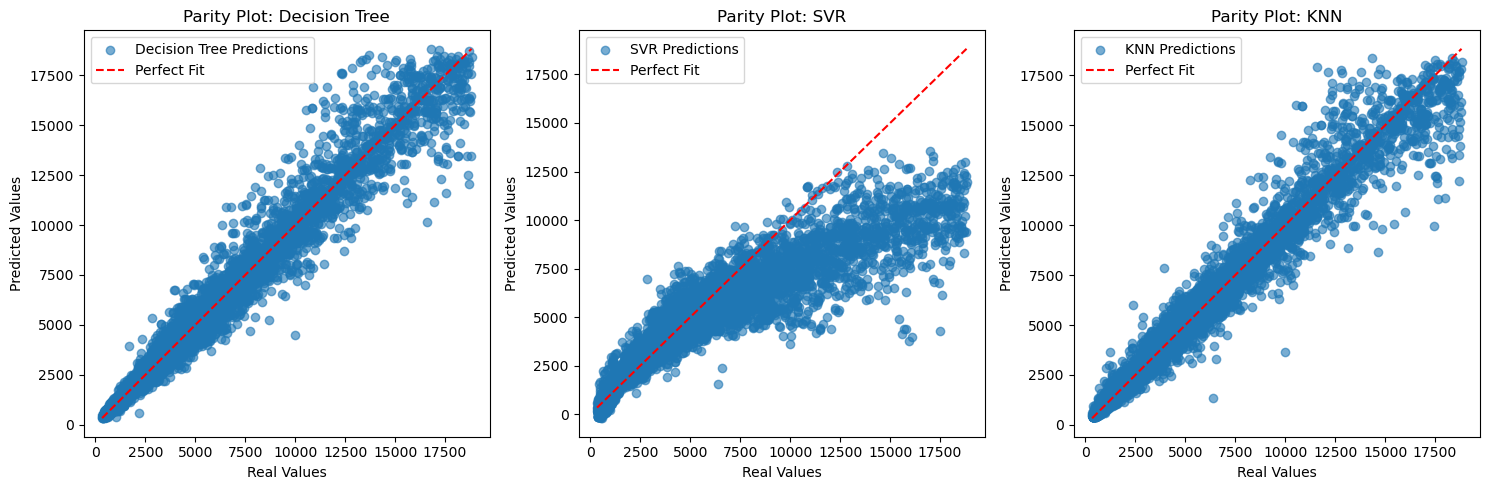

In [87]:
# Generate predictions for each model
dt_predictions = models["Decision Tree"].predict(x_test_scaled)
svr_predictions = models["SVR"].predict(x_test_scaled)
knn_predictions = models["KNN"].predict(x_test_scaled)

# Store predictions for easy iteration
models_predictions = {
    "Decision Tree": dt_predictions,
    "SVR": svr_predictions,
    "KNN": knn_predictions
}

# Plot and save the parity plots
plt.figure(figsize=(15, 5))
for i, (name, predictions) in enumerate(models_predictions.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, predictions, alpha=0.6, label=f"{name} Predictions")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
    plt.xlabel("Real Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Parity Plot: {name}")
    plt.legend()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("Model_Predictions_Parity_Plot.jpg", dpi=300, bbox_inches='tight')  # Save the plot

# Display the plot
plt.show()


1) The points are relatively close to the diagonal lines in both Decision Tree model and KNN, meanwhile some of the points are deviated from the diagonal line which leads to conclusion that the model is struggles to predict accurate values. The model is perform well in predicting lowest values than higher values correctly.
2) The SVR model is more scattered than other models, it shows wider range of errors.
3) As of my conclusion the Decision Tree model performs better than other models.

9) `Calculate the prediction errors of each observation from the testset and obtained by each model. Make conclusions about the predictions, which have the biggest prediction error. Compare the prediction errors. Are there any observations badly predicted by all the methods?`

In [ ]:
# Calculate prediction errors
errors = pd.DataFrame({
    "Real Value": y_test.ravel(), 
    "Decision Tree Prediction": dt_predictions,
    "Decision Tree Error": np.abs(y_test.ravel() - dt_predictions),
    "SVR Prediction": svr_predictions,
    "SVR Error": np.abs(y_test.ravel() - svr_predictions),
    "KNN Prediction": knn_predictions,
    "KNN Error": np.abs(y_test.ravel() - knn_predictions)
})
threshold = 1500

# Sort by largest error for any model
errors["Max Error"] = errors[["Decision Tree Error", "SVR Error", "KNN Error"]].max(axis=1)
errors["Worst Model"] = errors[["Decision Tree Error", "SVR Error", "KNN Error"]].idxmax(axis=1)
sorted_errors = errors.sort_values(by="Max Error", ascending=False)

# Display the largest errors
print("Top observations with the largest errors:")
print(sorted_errors.head())

summary_stats = errors[["Decision Tree Error", "SVR Error", "KNN Error"]].describe()
print("\nSummary statistics for prediction errors:")
print(summary_stats.head())

# Badly predicted by all models
bad_predictions = errors[(errors["Decision Tree Error"] > threshold) &
                         (errors["SVR Error"] > threshold) &
                         (errors["KNN Error"] > threshold)]

print("\nObservations badly predicted by all models:")
print(bad_predictions.head())


### Top Observations with the Largest Errors

| Index | Real Value | Decision Tree Prediction | Decision Tree Error | SVR Prediction | SVR Error    | KNN Prediction | KNN Error    | Max Error    | Worst Model  |
|-------|------------|--------------------------|---------------------|----------------|--------------|----------------|--------------|--------------|--------------|
| 9031  | 17499      | 17958.142857            | 459.142857          | 4270.885075    | 13228.114925 | 12456.176849   | 5042.823151  | 13228.114925 | SVR Error    |
| 7037  | 15928      | 15125.714286            | 802.285714          | 3742.242754    | 12185.757246 | 14807.142452   | 1120.857548  | 12185.757246 | SVR Error    |
| 4118  | 16087      | 16080.800000            | 6.200000            | 3986.880651    | 12100.119349 | 17181.754351   | 1094.754351  | 12100.119349 | SVR Error    |
| 9069  | 15575      | 15125.714286            | 449.285714          | 4106.785286    | 11468.214714 | 15826.580435   | 251.580435   | 11468.214714 | SVR Error    |
| 9821  | 17598      | 15070.500000            | 2527.500000         | 6144.008862    | 11453.991138 | 12381.072572   | 5216.927428  | 11453.991138 | SVR Error    |

### Summary Statistics for Prediction Errors

| Statistic   | Decision Tree Error | SVR Error     | KNN Error     |
|-------------|----------------------|---------------|---------------|
| Count       | 10788               | 10788         | 10788         |
| Mean        | 330.041685          | 917.903556    | 336.862175    |
| Std         | 580.655296          | 1528.649625   | 569.772082    |
| Min         | 0.000000            | 0.095373      | 0.000000      |
| 25%         | 33.600000           | 157.576990    | 59.576207     |

### Observations Badly Predicted by All Models

| Index | Real Value | Decision Tree Prediction | Decision Tree Error | SVR Prediction | SVR Error    | KNN Prediction | KNN Error    | Max Error    | Worst Model  |
|-------|------------|--------------------------|---------------------|----------------|--------------|----------------|--------------|--------------|--------------|
| 43    | 15745      | 18303.333333            | 2558.333333         | 9421.747725    | 6323.252275  | 17289.535233   | 1544.535233  | 6323.252275  | SVR Error    |
| 73    | 13677      | 15977.000000            | 2300.000000         | 10786.288266   | 2890.711734  | 16790.392128   | 3113.392128  | 3113.392128  | KNN Error    |
| 152   | 15562      | 13074.125000            | 2487.875000         | 11354.279310   | 4207.720690  | 13232.157798   | 2329.842202  | 4207.720690  | SVR Error    |
| 158   | 13168      | 11645.600000            | 1522.400000         | 7214.236517    | 5953.763483  | 10878.334378   | 2289.665622  | 5953.763483  | SVR Error    |
| 218   | 13156      | 11283.857143            | 1872.142857         | 8688.323992    | 4467.676008  | 8860.774759    | 4295.225241  | 4467.676008  | SVR Error    |


1) The Decision Tree and KNN models generally have smaller errors compared to SVR. 
2) They seem to be more robust and provide more reliable predictions.

### Task 3: Kfold cross validation

1) `Use the functions Kfold to split your data into 5 disjoint datasets. Output the indexes of the observations in each splited dataset.`

2) `Build 5 models for each of the ML methods, each time taking one dataset as a testset and joint remaining datasets as a training set. Use the best hyper-parameter values for each model found in task 2.`

3) `Evaluate the models' performance of each fold for each ML method separately on the base of R2 metric. Output the results of each fold and compute an average value of the metric.`

4) `Make conclusions about the best model and corresponding ML method.`

In [ ]:
# Load dataset
data = pd.read_csv('diamonds.csv')

# Encode categorical variables
label_encoders = {}
for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    data[f"{col}_encoded"] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
X = data[['carat', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'depth', 'table', 'x', 'y', 'z']]
y = data['price'].values  # Ensure y is a 1D array

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models with hyperparameters
models = {
    'Decision Tree': DecisionTreeRegressor(max_depth=10, min_samples_split=5),
    'SVR': SVR(kernel='rbf', C=10, gamma=0.1),
    'KNN': KNeighborsRegressor(n_neighbors=5),
}

# Initialize lists to store metrics
r2_data, mse_data, mae_data = [], [], []

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    # y_train = y_train.values.ravel()
    # y_test = y_test.values.ravel()

    # Scale the features for SVR and KNN
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and evaluate each model
    for name, model in models.items():
        if name in ['SVR', 'KNN']:
            model.fit(X_train_scaled, y_train)
            y_test_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)

        # Calculate metrics
        r2 = r2_score(y_test, y_test_pred)
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)

        # Append metrics
        r2_data.append({'Model': name, 'Fold': fold, 'R²': r2})
        mse_data.append({'Model': name, 'Fold': fold, 'MSE': mse})
        mae_data.append({'Model': name, 'Fold': fold, 'MAE': mae})

# Create dataframes from results
r2_df = pd.DataFrame(r2_data)
mse_df = pd.DataFrame(mse_data)
mae_df = pd.DataFrame(mae_data)

# Print metrics for each fold
print("Metrics for Each Fold:")
print("\nR² Scores:")
print(r2_df)
print("\nMSE Scores:")
print(mse_df)
print("\nMAE Scores:")
print(mae_df)

# Calculate and print average metrics
print("\nAverage Metrics Across Folds:")
for metric_name, df in [('R²', r2_df), ('MSE', mse_df), ('MAE', mae_df)]:
    print(f"\n{metric_name}:")
    print(df.groupby('Model').mean().reset_index())


### Metrics for Each Fold:

#### R² Scores:
| Model          | Fold | R²        |
|----------------|------|-----------|
| Decision Tree  | 1    | 0.975059  |
| SVR            | 1    | 0.875707  |
| KNN            | 1    | 0.958439  |
| Decision Tree  | 2    | 0.975145  |
| SVR            | 2    | 0.875690  |
| KNN            | 2    | 0.955992  |
| Decision Tree  | 3    | 0.970787  |
| SVR            | 3    | 0.865763  |
| KNN            | 3    | 0.953832  |
| Decision Tree  | 4    | 0.972093  |
| SVR            | 4    | 0.870669  |
| KNN            | 4    | 0.958517  |
| Decision Tree  | 5    | 0.975051  |
| SVR            | 5    | 0.874312  |
| KNN            | 5    | 0.960473  |

#### MSE Scores:
| Model          | Fold | MSE          |
|----------------|------|--------------|
| Decision Tree  | 1    | 3.964805e+05 |
| SVR            | 1    | 1.975866e+06 |
| KNN            | 1    | 6.606841e+05 |
| Decision Tree  | 2    | 3.920609e+05 |
| SVR            | 2    | 1.960877e+06 |
| KNN            | 2    | 6.941906e+05 |
| Decision Tree  | 3    | 4.637736e+05 |
| SVR            | 3    | 2.131100e+06 |
| KNN            | 3    | 7.329461e+05 |
| Decision Tree  | 4    | 4.541619e+05 |
| SVR            | 4    | 2.104722e+06 |
| KNN            | 4    | 6.750900e+05 |
| Decision Tree  | 5    | 3.929475e+05 |
| SVR            | 5    | 1.979550e+06 |
| KNN            | 5    | 6.225401e+05 |

#### MAE Scores:
| Model          | Fold | MAE         |
|----------------|------|-------------|
| Decision Tree  | 1    | 341.891522  |
| SVR            | 1    | 696.607583  |
| KNN            | 1    | 408.812106  |
| Decision Tree  | 2    | 340.456190  |
| SVR            | 2    | 698.085508  |
| KNN            | 2    | 409.474397  |
| Decision Tree  | 3    | 353.403203  |
| SVR            | 3    | 715.368953  |
| KNN            | 3    | 411.790415  |
| Decision Tree  | 4    | 352.605795  |
| SVR            | 4    | 713.917781  |
| KNN            | 4    | 413.001038  |
| Decision Tree  | 5    | 334.651392  |
| SVR            | 5    | 698.363293  |
| KNN            | 5    | 406.225547  |

---

### Average Metrics Across Folds:

#### R²:
| Model          | Fold | R²        |
|----------------|------|-----------|
| Decision Tree  | 3.0  | 0.973627  |
| KNN            | 3.0  | 0.957451  |
| SVR            | 3.0  | 0.872428  |

#### MSE:
| Model          | Fold | MSE            |
|----------------|------|----------------|
| Decision Tree  | 3.0  | 4.198849e+05   |
| KNN            | 3.0  | 6.770902e+05   |
| SVR            | 3.0  | 2.030423e+06   |

#### MAE:
| Model          | Fold | MAE          |
|----------------|------|--------------|
| Decision Tree  | 3.0  | 344.601621   |
| KNN            | 3.0  | 409.860701   |
| SVR            | 3.0  | 704.468624   |


1) Decision Tree appears to be the best-performing model with consistently high R² scores.. It indicating better predictive accuracy.
2) Good overall performance, but slightly lower R² compared to the Decision Tree.